In [1]:
import torch
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.insert(0, './src')
from data import Dataset
from training import train
from plotting import plot_mfg_classification, plot_mcdo_classification, mfg_regression_inference, mcdo_regression_inference, plot_pred_to_true
from metrics import log_likelihood, log_likelihood_errors

In [2]:
def set_seeds(rand_seed):
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.manual_seed(rand_seed)
    np.random.seed(rand_seed)
    random.seed(rand_seed)
    torch.cuda.manual_seed_all(rand_seed)

set_seeds(1337)

In [3]:
class dotdict(dict):
    """dot.notation access to dictionary attributes"""
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

```python 
DATASETS = {
    'boston_housing': BostonHousingData,
    'concrete': ConcreteData,
    'energy_efficiency': EnergyEfficiencyData,
    'kin8nm': Kin8nmData,
    'naval_propulsion': NavalPropulsionData,
    'ccpp': CCPPData,
    'protein_structure': ProteinStructureData,
    'red_wine': RedWineData,
    'yacht_hydrodynamics': YachtHydrodynamicsData,
    'year_prediction_msd': YearPredictionMSDData,
    'mnist': MnistData,
    'fashion_mnist': FashionMnistData,
    'cifar_10': Cifar10,
    'svhn': SVHN
}
```

In [4]:
args = dotdict({})

In [5]:
args['device'] = 'cuda:0' if torch.cuda.is_available() else 'cpu'
args['torchType'] = torch.float32

args['model_type'] = 'mcdo' # 'mcdo', 'mfg'
args['dataset_name'] = 'boston_housing'
if args['dataset_name'].find('mnist') > -1:
    args['num_epoches'] = 201
    args['print_info'] = 50
    args['n_IS'] = 10000
    
    args['train_batch_size'] = 100
    args['val_dataset'] = 10000
    args['val_batch_size'] = 100
    args['test_batch_size'] = 100
else:
    args['n_IS'] = 1000
    args['num_epoches'] = 10001
    args['print_info'] = 1000
    args['train_batch_size'] = 100
    args['val_dataset'] = 200
    args['val_batch_size'] = 20
    args['test_batch_size'] = 10

In [6]:
dataset = Dataset(args)
dataset.in_features

/home/nkotelevskii/anaconda3/envs/condatorch/lib/python3.7/site-packages/alpaca/dataloader/boston_housing.py:37: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  self.df = pd.read_table(data_path, names=self.column_names, header=None, delim_whitespace=True)


Train data shape 306


(13,)

In [7]:
# model, params = train(args, dataset)

In [8]:
# obj_id = 21

# if args.problem == 'classification':
#     if args.model_type == 'mfg':
#         plot_mfg_classification(args, model, dataset, params)
#     elif args.model_type == 'mcdo':
#         plot_mcdo_classification(args, model, dataset, params)
# else:
#     if args.model_type == 'mfg':
#         mfg_regression_inference(args, model, dataset, params, obj_id)
#     elif args.model_type == 'mcdo':
#         mcdo_regression_inference(args, model, dataset, params, obj_id)

## Comparison of MFG and MCDO

In [9]:
## MFG
args['model_type'] = 'mfg' # 'mcdo', 'mfg'
model_mfg, params_mfg, list_mfg = train(args, dataset)

  0%|          | 10/10001 [00:00<01:44, 95.79it/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 52]             728
            Linear-2                [-1, 1, 10]             530
          Softplus-3                [-1, 1, 10]               0
Total params: 1,258
Trainable params: 1,258
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.01
----------------------------------------------------------------
ELBO value is -11805.87890625 on epoch number 0
Mean validation MSE at epoch number 0 is 1487.4583740234375
Current KL is 1.1962075233459473


 10%|█         | 1011/10001 [00:09<01:27, 103.05it/s]

ELBO value is -67.5845718383789 on epoch number 1000
Mean validation MSE at epoch number 1000 is 69.20706939697266
Current KL is 1.1514439582824707


 20%|██        | 2012/10001 [00:19<01:18, 101.59it/s]

ELBO value is -712.4618530273438 on epoch number 2000
Mean validation MSE at epoch number 2000 is 27.253650665283203
Current KL is 1.4685986042022705


 30%|██▉       | 2991/10001 [00:29<01:09, 101.56it/s]

ELBO value is -122.98553466796875 on epoch number 3000
Mean validation MSE at epoch number 3000 is 31.57436180114746
Current KL is 1.9131001234054565


KeyError: 'early_stopping_tol'

In [10]:
## MCDO
args['model_type'] = 'mcdo' # 'mcdo', 'mfg'
model_mcdo, params_mcdo, list_mcdo = train(args, dataset)


  0%|          | 14/10001 [00:00<01:12, 137.94it/s]

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 52]             728
            Linear-2                [-1, 1, 10]             530
          Softplus-3                [-1, 1, 10]               0
Total params: 1,258
Trainable params: 1,258
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.01
----------------------------------------------------------------
Log likelihood value is -2692.181396484375 on epoch number 0
Mean validation MSE at epoch number 0 is 325.85992431640625



 10%|█         | 1019/10001 [00:06<01:02, 144.78it/s]

Log likelihood value is -133.94888305664062 on epoch number 1000
Mean validation MSE at epoch number 1000 is 65.53047180175781



 20%|██        | 2024/10001 [00:13<00:54, 146.45it/s]

Log likelihood value is -1444.6466064453125 on epoch number 2000
Mean validation MSE at epoch number 2000 is 61.29829025268555



 30%|███       | 3029/10001 [00:20<00:48, 145.16it/s]

Log likelihood value is -151.5941162109375 on epoch number 3000
Mean validation MSE at epoch number 3000 is 46.41902160644531



 40%|████      | 4020/10001 [00:27<00:40, 147.49it/s]

Log likelihood value is -103.56121063232422 on epoch number 4000
Mean validation MSE at epoch number 4000 is 46.0941162109375



 50%|█████     | 5026/10001 [00:34<00:34, 144.44it/s]

Log likelihood value is -106.98652648925781 on epoch number 5000
Mean validation MSE at epoch number 5000 is 36.07151412963867



 60%|██████    | 6016/10001 [00:41<00:27, 144.05it/s]

Log likelihood value is -75.29830932617188 on epoch number 6000
Mean validation MSE at epoch number 6000 is 32.41150665283203



 70%|███████   | 7021/10001 [00:47<00:20, 144.34it/s]

Log likelihood value is -47.79107666015625 on epoch number 7000
Mean validation MSE at epoch number 7000 is 29.928817749023438



 80%|████████  | 8026/10001 [00:54<00:13, 147.05it/s]

Log likelihood value is -70.33158874511719 on epoch number 8000
Mean validation MSE at epoch number 8000 is 27.595813751220703



 90%|█████████ | 9016/10001 [01:01<00:06, 144.73it/s]

Log likelihood value is -18.950439453125 on epoch number 9000
Mean validation MSE at epoch number 9000 is 23.302967071533203



100%|█████████▉| 9991/10001 [01:08<00:00, 147.98it/s]

Log likelihood value is -58.77580261230469 on epoch number 10000
Mean validation MSE at epoch number 10000 is 25.00528335571289


KeyError: 'early_stopping_tol'


100%|█████████▉| 9991/10001 [01:20<00:00, 147.98it/s]

In [1]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

if args.problem == 'regression':
    svr = SVR()
    gridcv = GridSearchCV(svr,
                         param_grid={
                            'C': [0.001, 0.01, 0.1, 1., 10.],
                             'epsilon': [0.01, 0.1, 1., 10],
                             'gamma': ['auto', 'scale'],
                          },
                          cv=5,
                          iid=True
                         )
    gridcv.fit(dataset.x_train, dataset.y_train.ravel())
    print(f'SVR\'s MSE validation score: {mean_squared_error(dataset.y_val, gridcv.predict(dataset.x_val))}')

NameError: name 'args' is not defined

### Likelihood estimation of errors (in normal assumption)

In [11]:
args['model_type'] = 'mfg' # 'mcdo', 'mfg'
mfg_ll = log_likelihood_errors(model_mfg, params_mfg, dataset, args)
print(f'MFG error\'s loglikelihood is {mfg_ll}')

args['model_type'] = 'mcdo' # 'mcdo', 'mfg'
mcdo_ll = log_likelihood_errors(model_mcdo, params_mcdo, dataset, args)
print(f'MCDO error\'s loglikelihood is {mcdo_ll}')

10it [00:01,  5.99it/s]
2it [00:00, 15.84it/s]

MFG error's loglikelihood is -2305.84130859375


10it [00:00, 15.79it/s]

MCDO error's loglikelihood is -63.05582809448242


### Pred to true plot

10it [00:01,  5.44it/s]


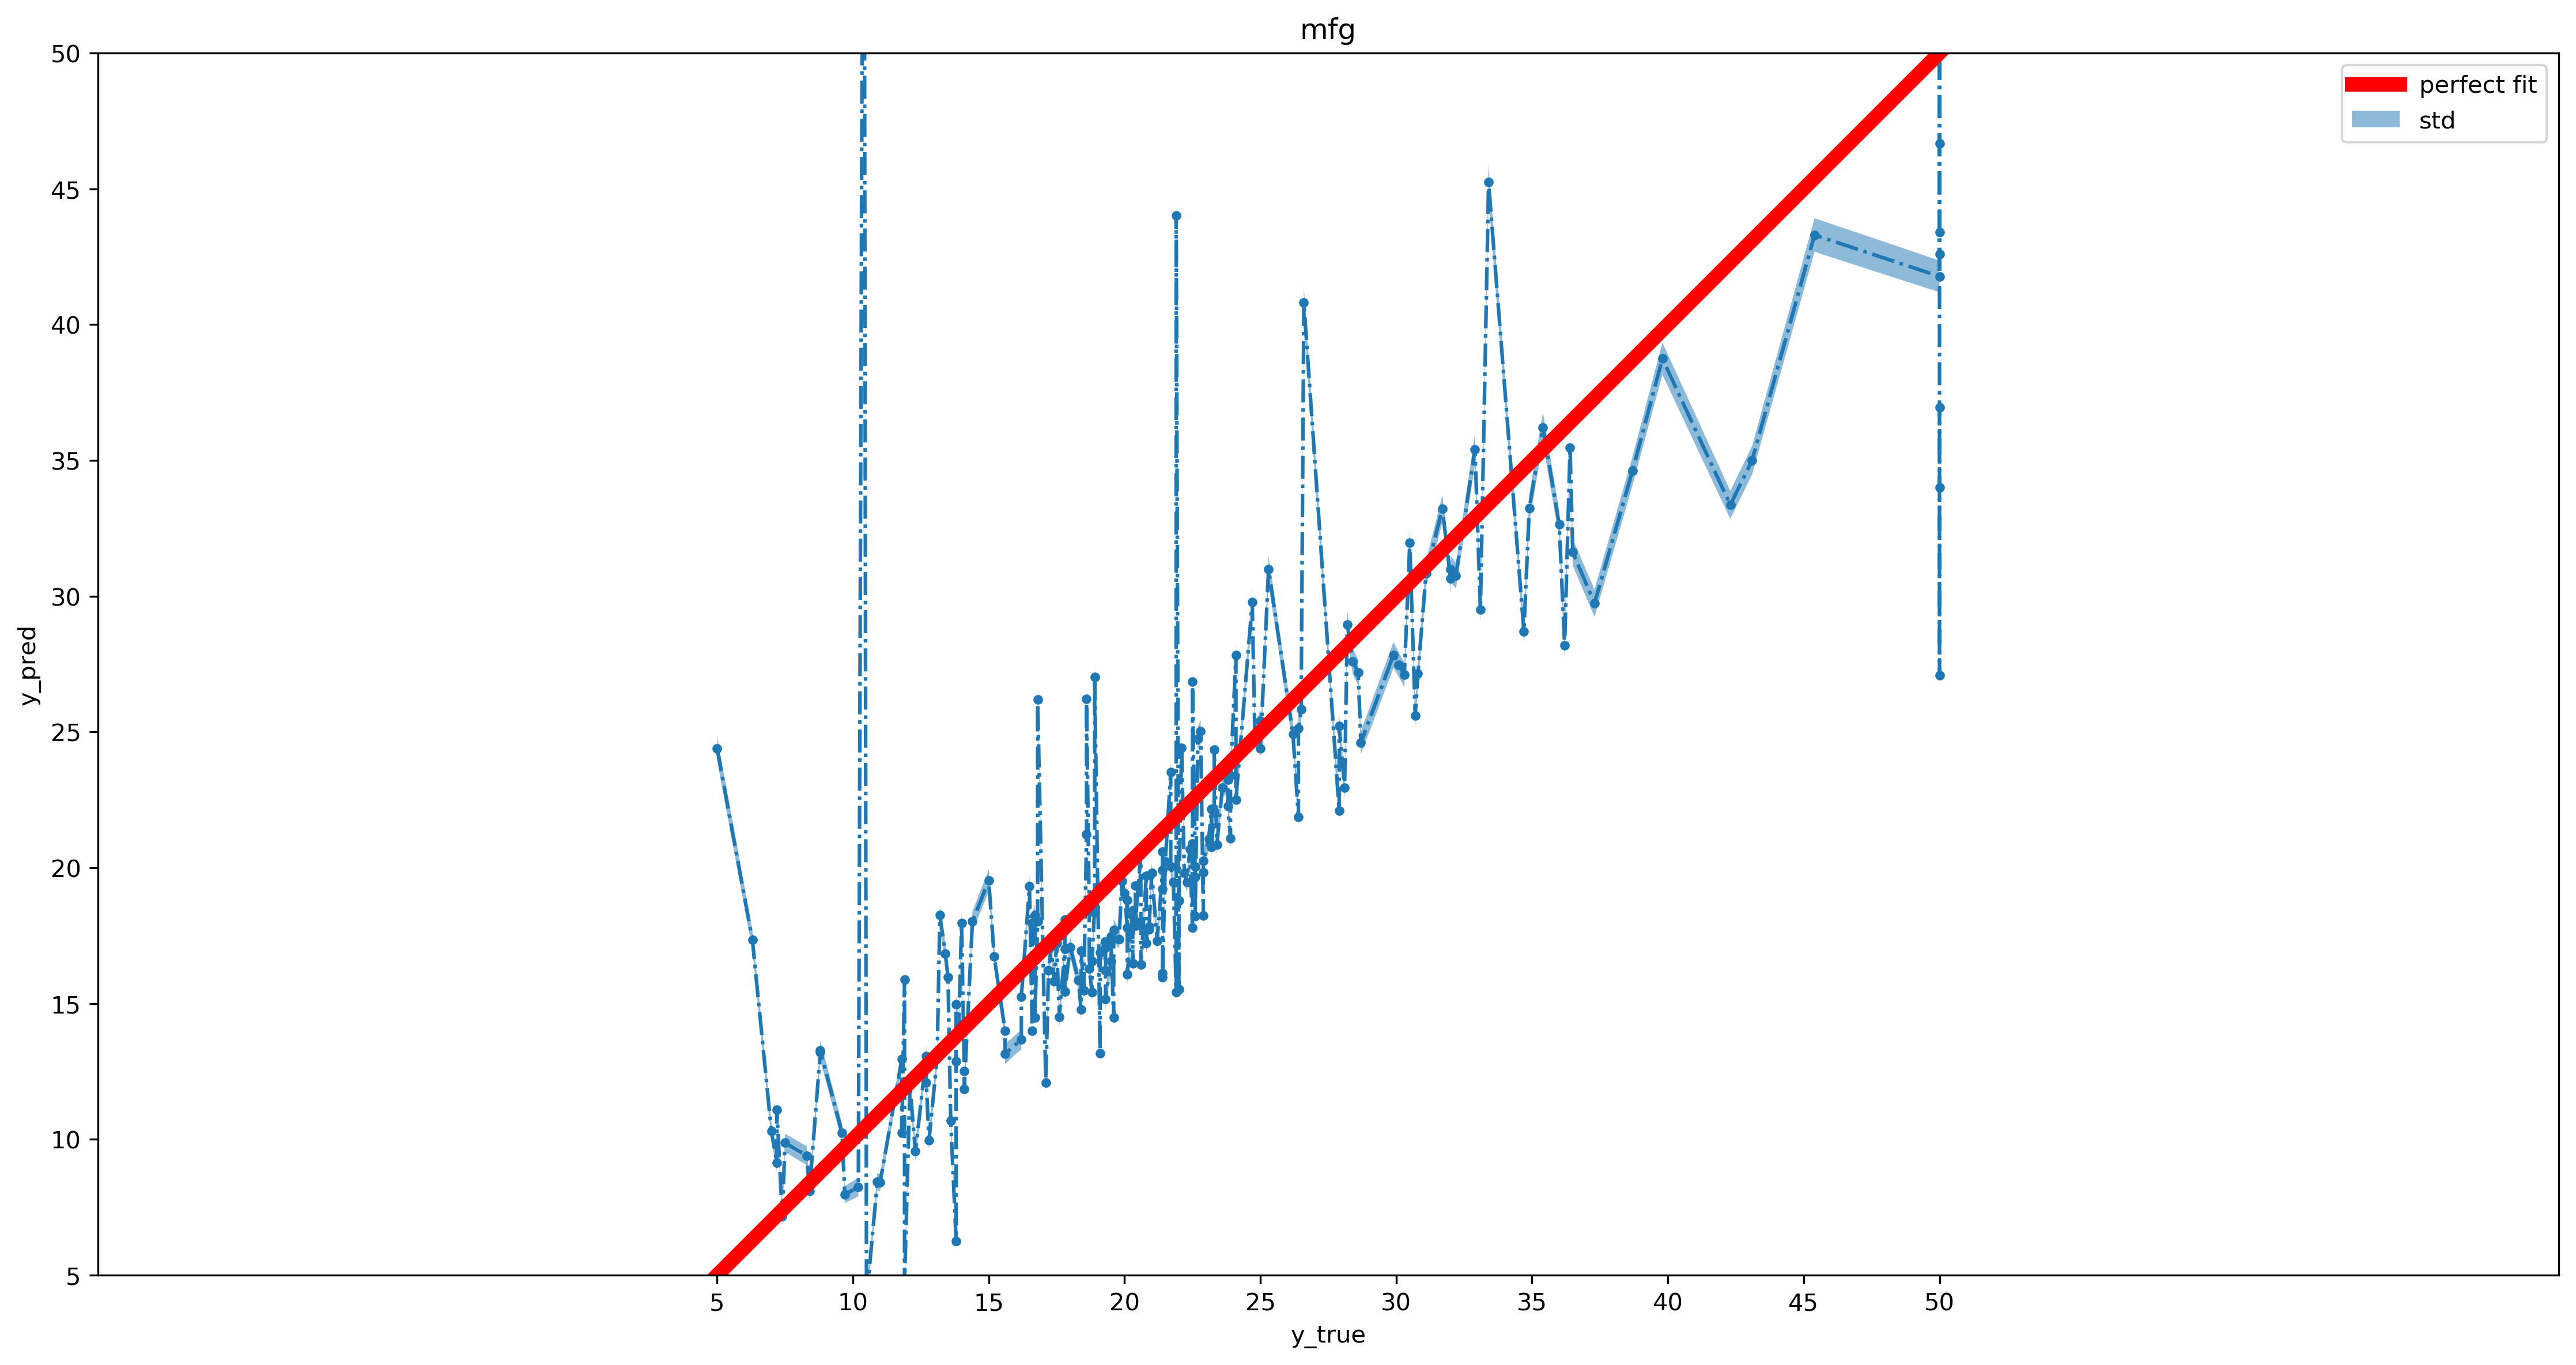

KeyError: 'model_mcdo'

In [10]:
for model_type in ['mfg', 'mcdo']:
    args['model_type'] = model_type
    model = globals()[f'model_{model_type}']
    params = globals()[f'params_{model_type}']
    examples, true_ans, pred_ans, pred_std = plot_pred_to_true(args, model, dataset, params, name=model_type)
    globals()[f'preds_{model_type}'] = pred_ans
    globals()[f'stds_{model_type}'] = pred_std    

In [ ]:
sk_pred = gridcv.predict(examples)

plt.figure(figsize=(15, 8), dpi=300)
plt.title('Sklearn model')
plt.plot(true_ans, sk_pred, '-..')
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.axis('equal')
plt.xlim(true_ans.min(), true_ans.max())
plt.ylim(true_ans.min(), true_ans.max())
plt.xticks(ticks=np.linspace(true_ans.min(), true_ans.max(), 10))
plt.yticks(ticks=np.linspace(true_ans.min(), true_ans.max(), 10))
plt.plot([true_ans.min(), true_ans.max()], [true_ans.min(), true_ans.max()], linewidth=6, c='r', label='perfect fit')
plt.legend()
plt.show();

### Likelihood estimation

In [ ]:
args['model_type'] = 'mfg' # 'mcdo', 'mfg'
mfg_ll = log_likelihood(model_mfg, params_mfg, dataset, args)

args['model_type'] = 'mcdo' # 'mcdo', 'mfg'
mcdo_ll = log_likelihood(model_mcdo, params_mcdo, dataset, args)

In [ ]:
print(f'Mean-Field-Gaussian loglikelihood: {np.mean(mfg_ll)} +/- {np.std(mfg_ll)}')
print(f'Monte-Carlo Dropout loglikelihood: {np.mean(mcdo_ll)} +/- {np.std(mcdo_ll)}')

$p_\theta(x, w) = p_\theta(x|w)p(w)$

$\log p_\theta(x) = \log \int_w p_\theta(x, w)dw = \log \int_w p_\theta(x|w)p(w)dw = \log \frac{1}{N_{is}} \sum_{i=1}^{N_{is}} p_\theta(x|w_i)$, w_i ~ p(w)

$\log p_\theta(x) = \log \int_w \frac{p_\theta(x, w)}{q_\phi(w|x)} q_\phi(w|x) dw = \log \frac{1}{N_{is}} \sum_{i=1}^{N_{is}} \frac{p_\theta(x, w_i)}{q_\phi(w_i|x)} = \log \frac{1}{N_{is}} \sum_{i=1}^{N_{is}} \frac{p_\theta(x| w_i) p(w_i)}{q_\phi(w_i|x)}$

## Inference Examples

----------------------------------------------------------------------------------------------------


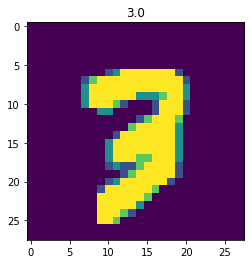

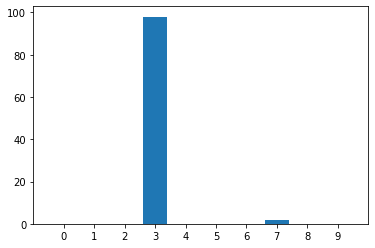

----------------------------------------------------------------------------------------------------


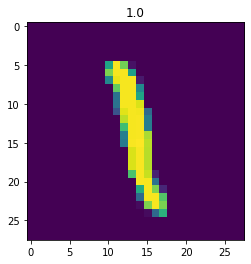

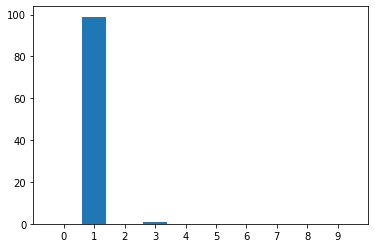

----------------------------------------------------------------------------------------------------


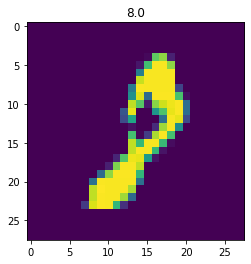

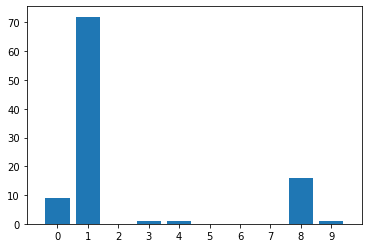

----------------------------------------------------------------------------------------------------


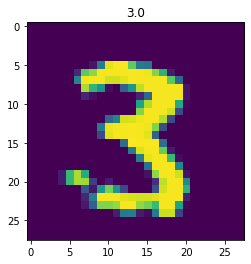

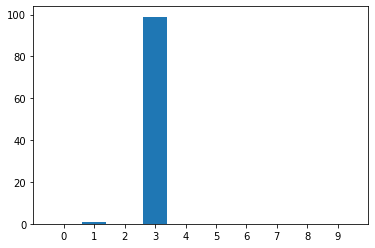

----------------------------------------------------------------------------------------------------


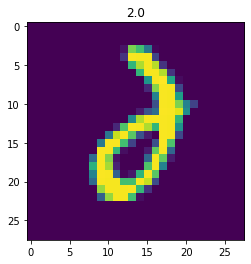

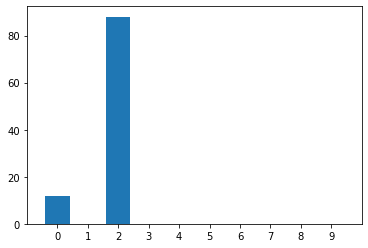

----------------------------------------------------------------------------------------------------


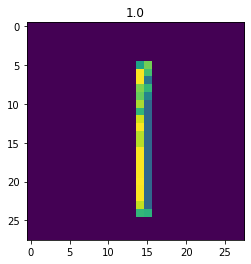

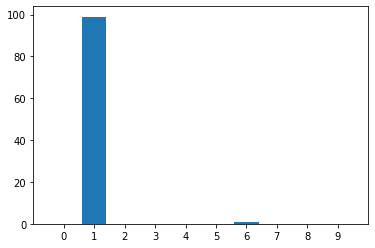

----------------------------------------------------------------------------------------------------


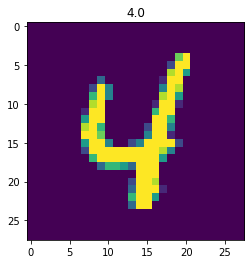

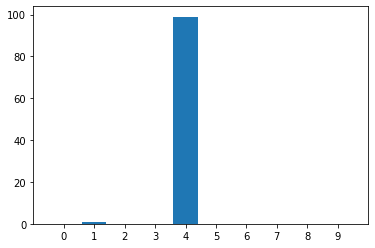

----------------------------------------------------------------------------------------------------


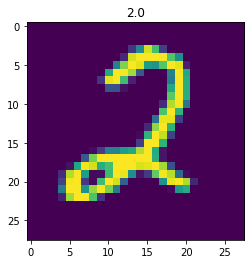

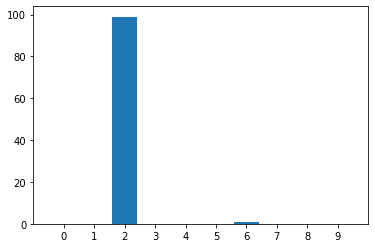

----------------------------------------------------------------------------------------------------


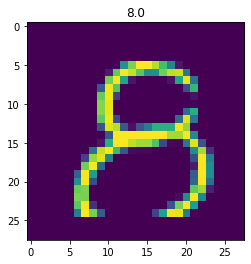

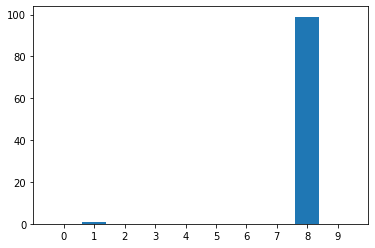

----------------------------------------------------------------------------------------------------


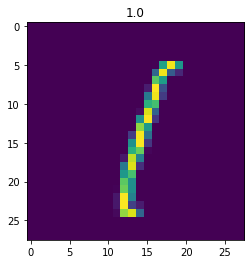

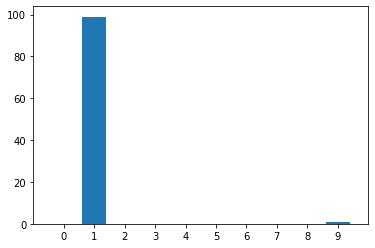

----------------------------------------------------------------------------------------------------


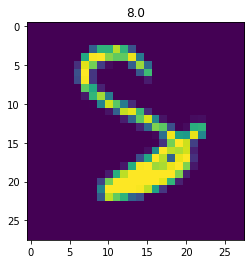

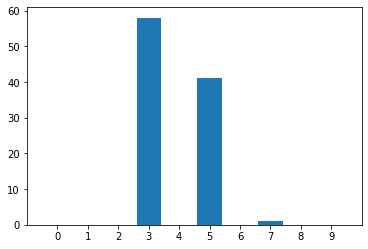

----------------------------------------------------------------------------------------------------


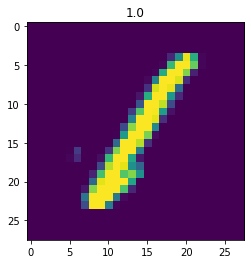

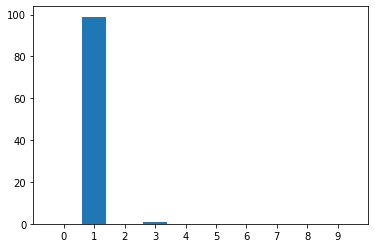

KeyboardInterrupt: 

In [10]:
plot_mfg_classification(args, model_mfg, dataset, params_mfg)

----------------------------------------------------------------------------------------------------


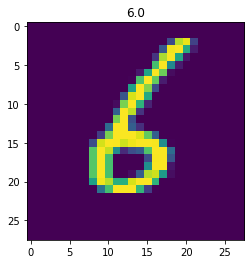

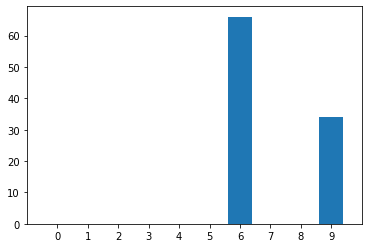

----------------------------------------------------------------------------------------------------


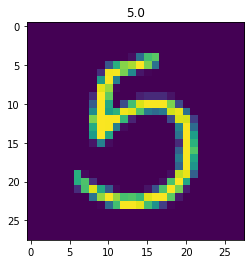

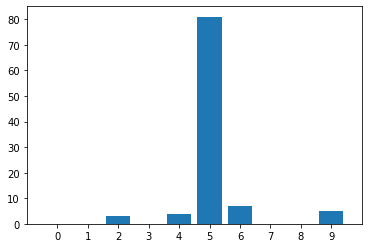

----------------------------------------------------------------------------------------------------


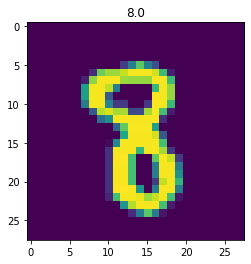

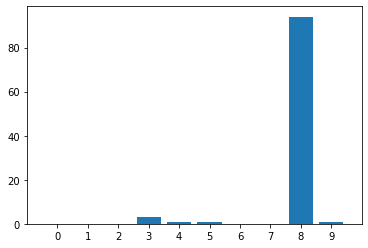

----------------------------------------------------------------------------------------------------


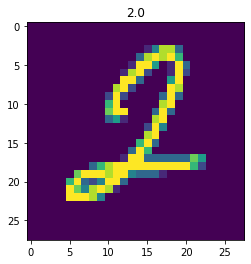

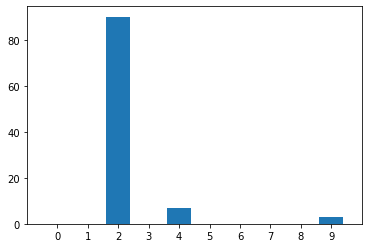

----------------------------------------------------------------------------------------------------


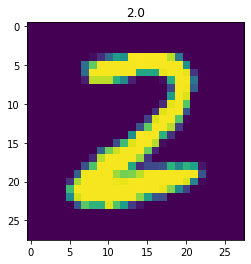

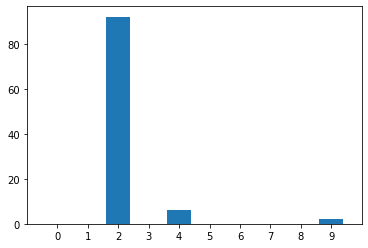

----------------------------------------------------------------------------------------------------


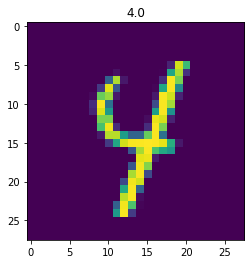

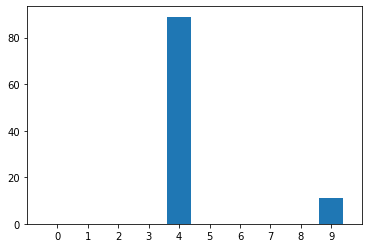

----------------------------------------------------------------------------------------------------


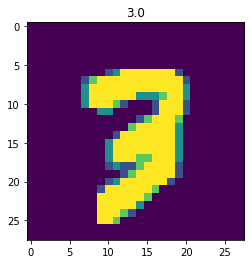

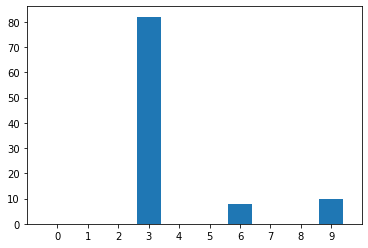

----------------------------------------------------------------------------------------------------


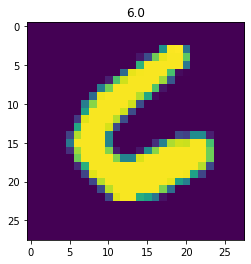

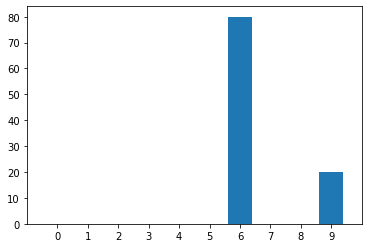

----------------------------------------------------------------------------------------------------


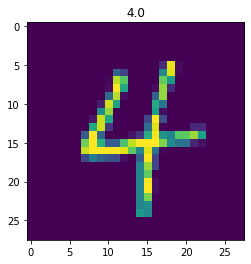

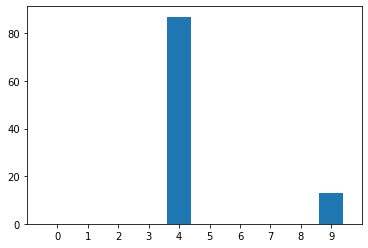

----------------------------------------------------------------------------------------------------


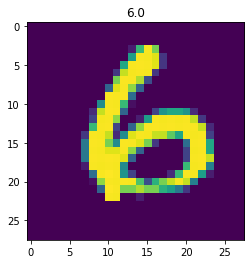

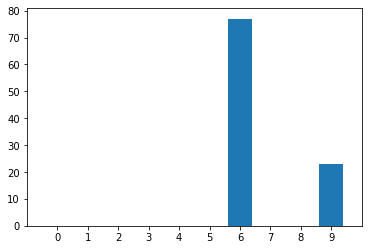

----------------------------------------------------------------------------------------------------


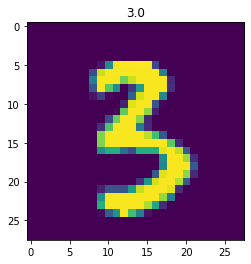

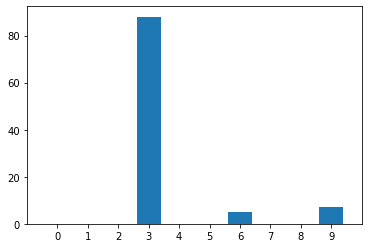

----------------------------------------------------------------------------------------------------


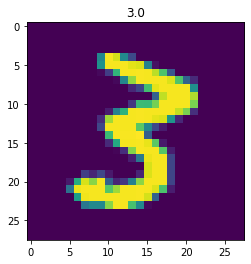

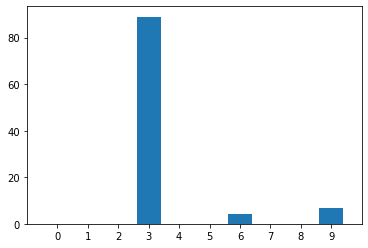

----------------------------------------------------------------------------------------------------


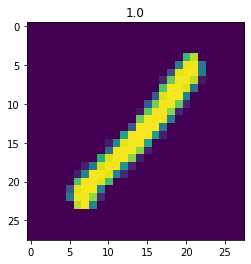

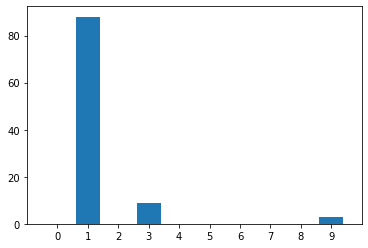

----------------------------------------------------------------------------------------------------


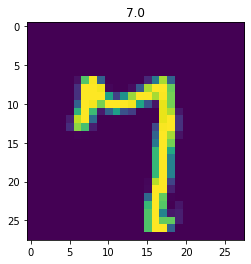

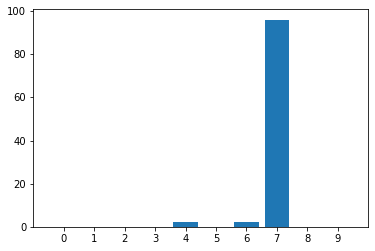

----------------------------------------------------------------------------------------------------


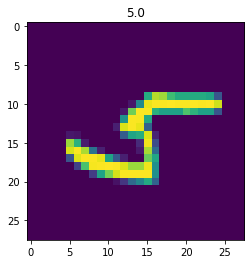

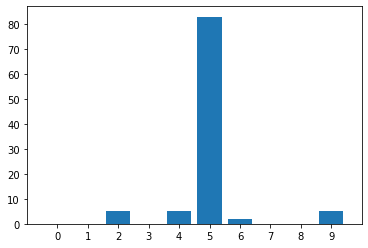

----------------------------------------------------------------------------------------------------


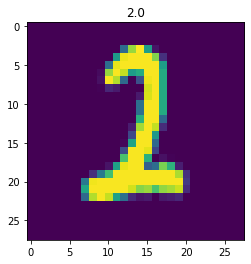

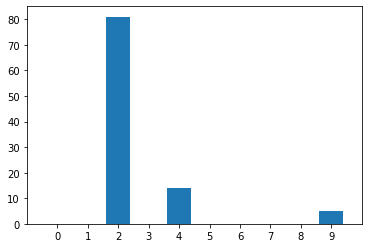

----------------------------------------------------------------------------------------------------


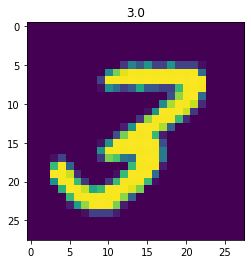

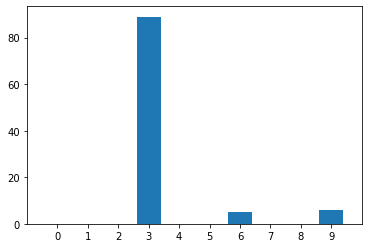

----------------------------------------------------------------------------------------------------


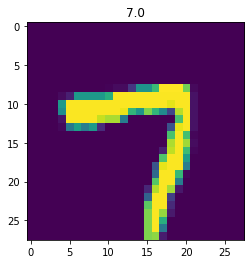

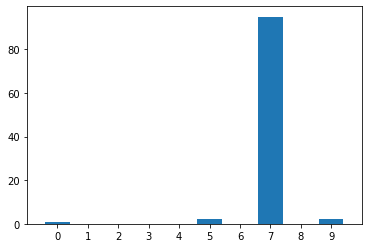

----------------------------------------------------------------------------------------------------


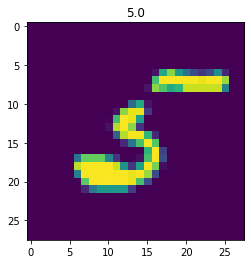

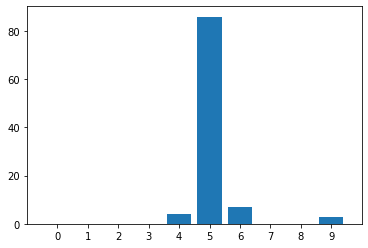

----------------------------------------------------------------------------------------------------


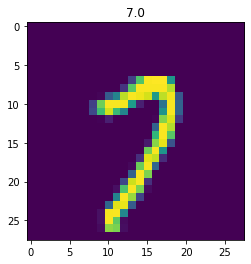

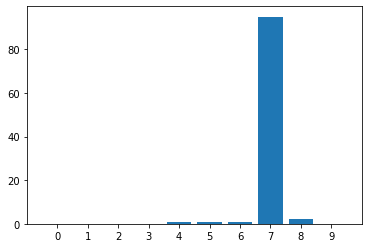

----------------------------------------------------------------------------------------------------


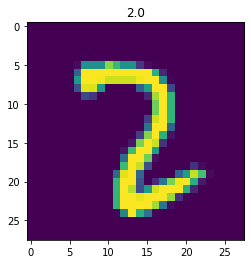

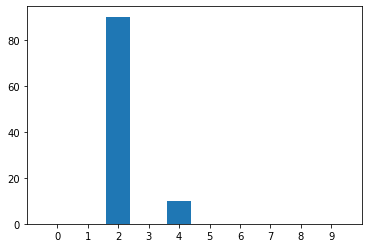

----------------------------------------------------------------------------------------------------


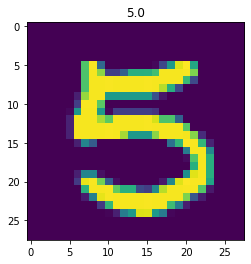

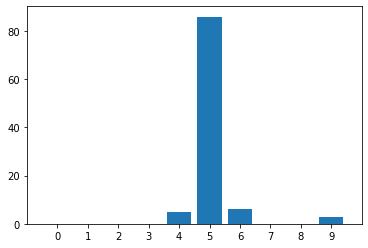

----------------------------------------------------------------------------------------------------


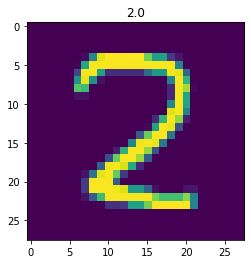

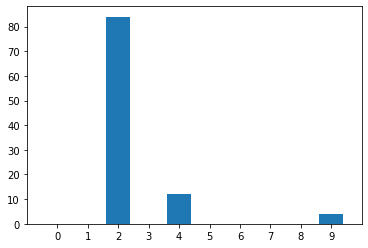

----------------------------------------------------------------------------------------------------


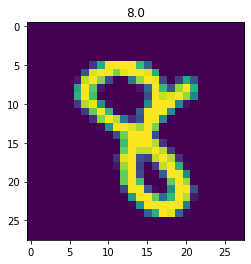

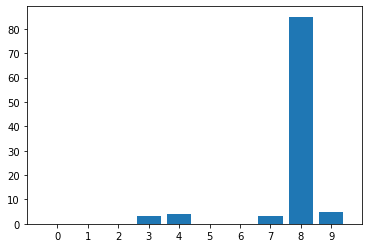

----------------------------------------------------------------------------------------------------


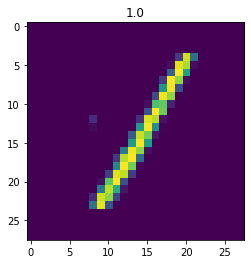

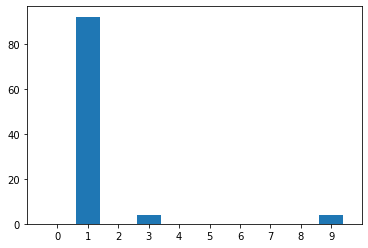

----------------------------------------------------------------------------------------------------


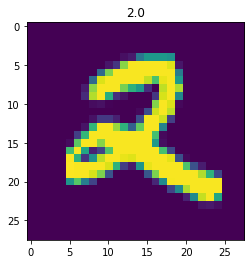

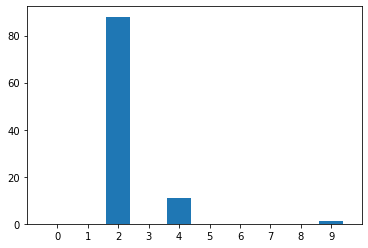

----------------------------------------------------------------------------------------------------


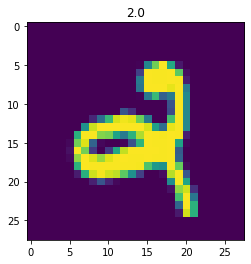

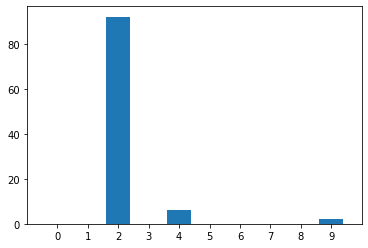

----------------------------------------------------------------------------------------------------


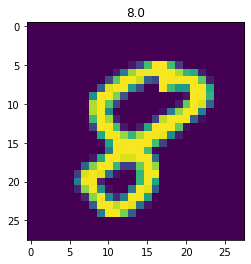

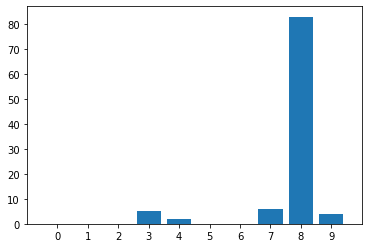

----------------------------------------------------------------------------------------------------


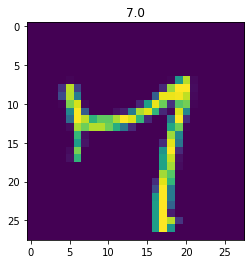

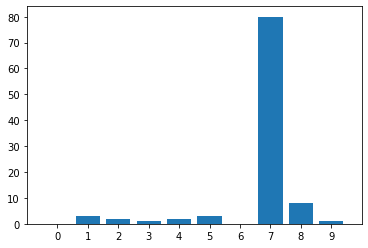

----------------------------------------------------------------------------------------------------


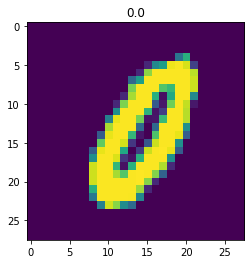

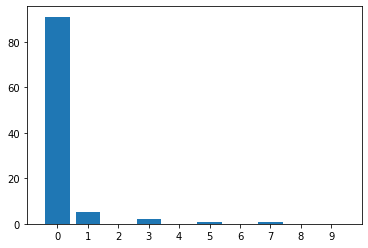

----------------------------------------------------------------------------------------------------


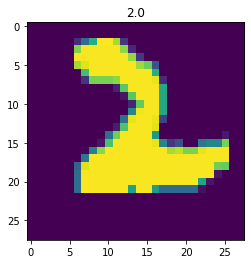

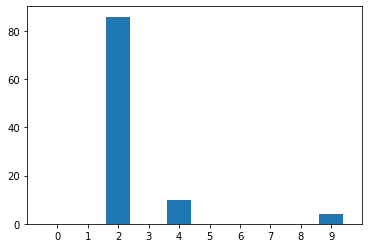

----------------------------------------------------------------------------------------------------


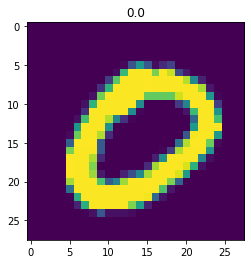

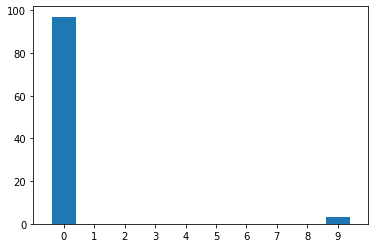

----------------------------------------------------------------------------------------------------


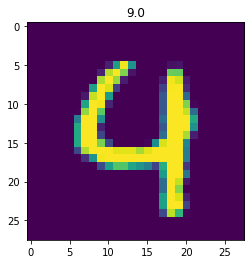

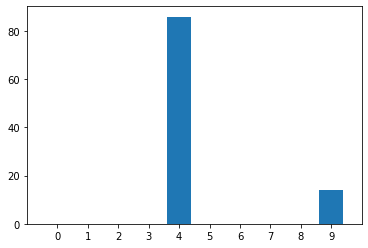

----------------------------------------------------------------------------------------------------


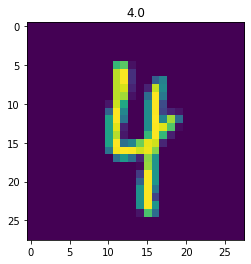

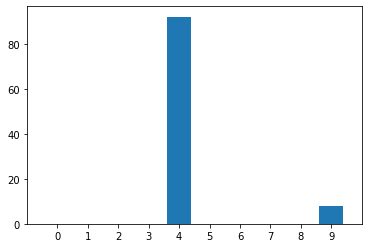

----------------------------------------------------------------------------------------------------


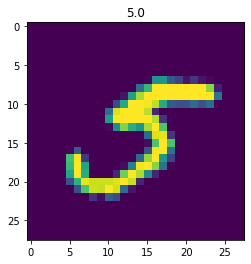

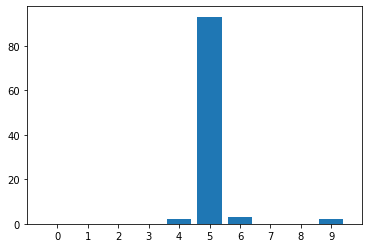

----------------------------------------------------------------------------------------------------


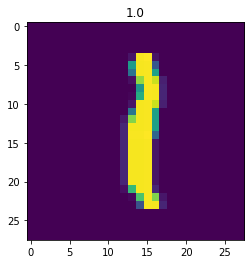

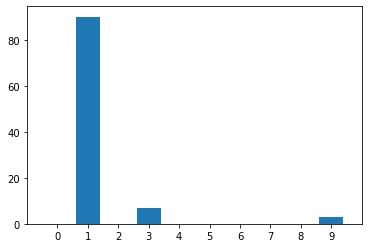

----------------------------------------------------------------------------------------------------


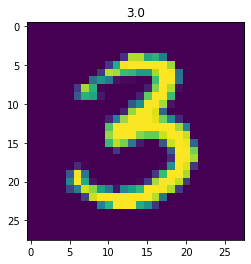

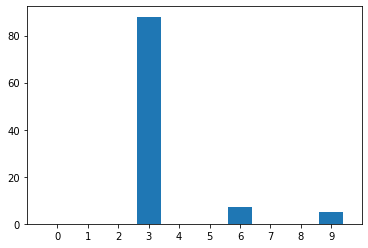

----------------------------------------------------------------------------------------------------


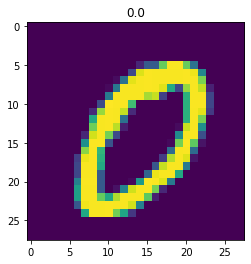

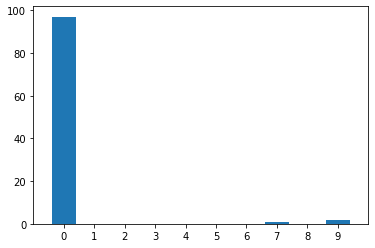

----------------------------------------------------------------------------------------------------


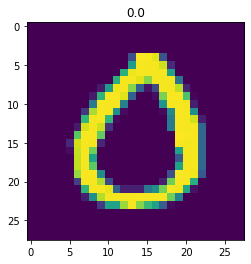

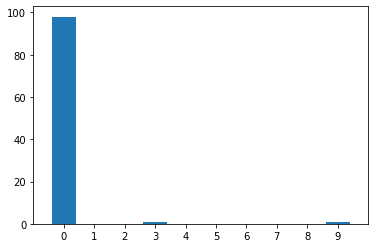

----------------------------------------------------------------------------------------------------


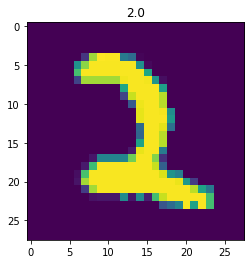

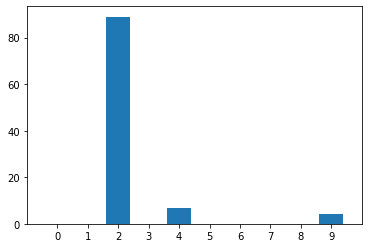

----------------------------------------------------------------------------------------------------


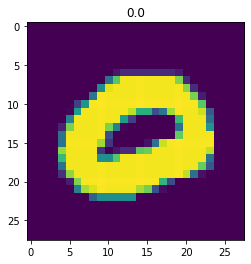

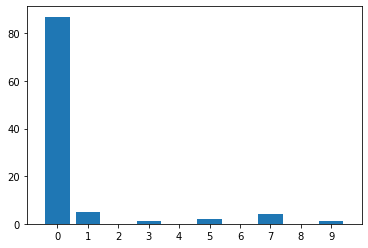

----------------------------------------------------------------------------------------------------


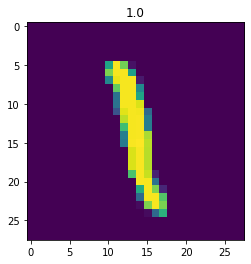

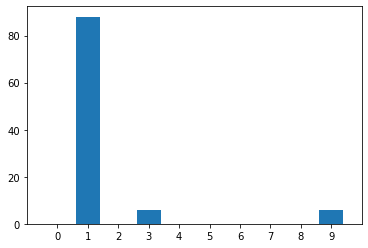

----------------------------------------------------------------------------------------------------


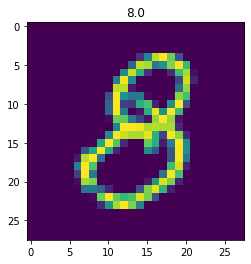

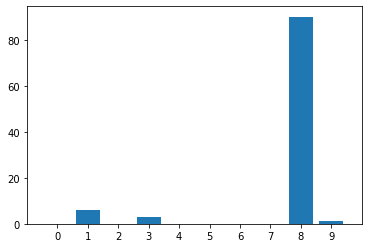

----------------------------------------------------------------------------------------------------


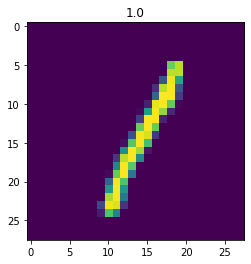

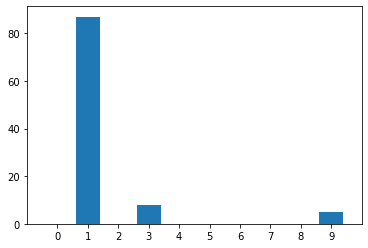

----------------------------------------------------------------------------------------------------


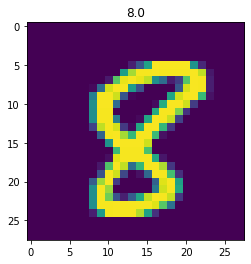

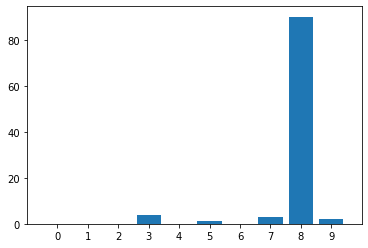

----------------------------------------------------------------------------------------------------


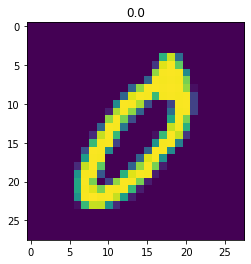

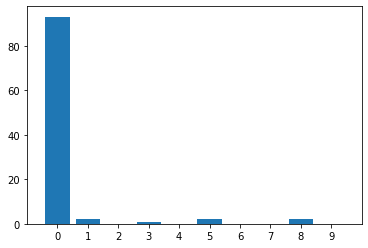

----------------------------------------------------------------------------------------------------


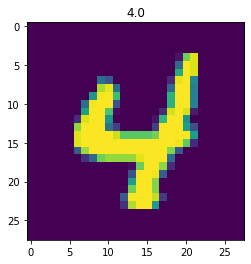

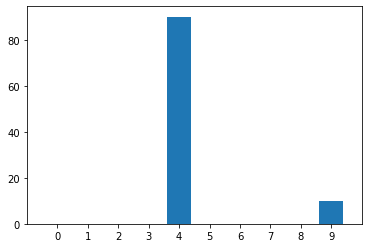

----------------------------------------------------------------------------------------------------


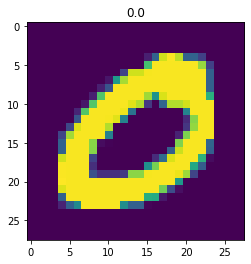

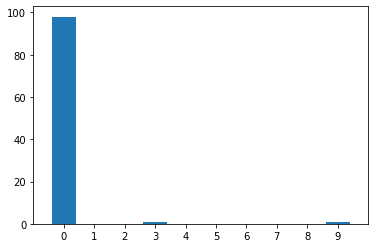

----------------------------------------------------------------------------------------------------


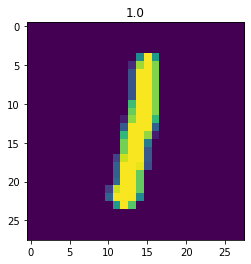

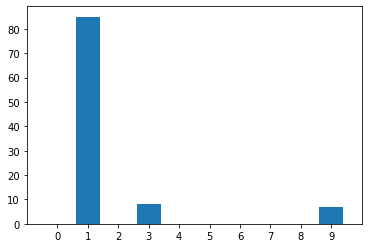

----------------------------------------------------------------------------------------------------


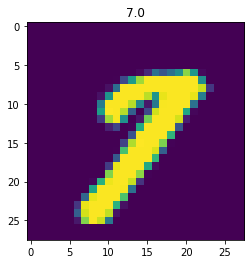

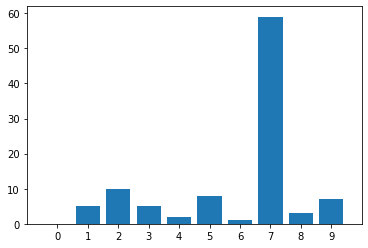

----------------------------------------------------------------------------------------------------


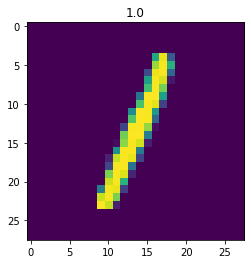

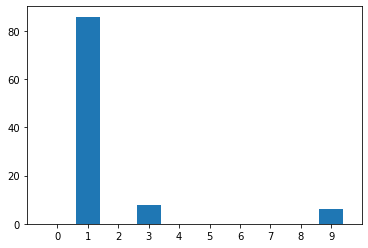

----------------------------------------------------------------------------------------------------


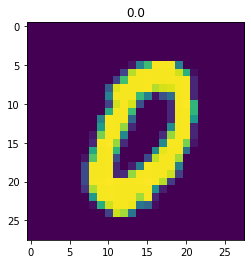

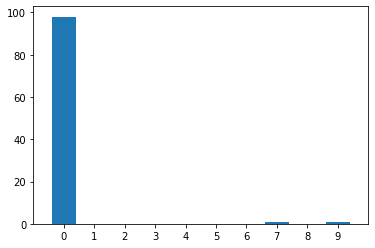

----------------------------------------------------------------------------------------------------


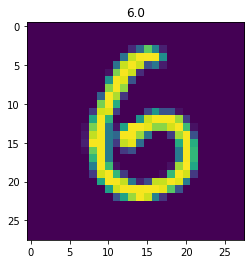

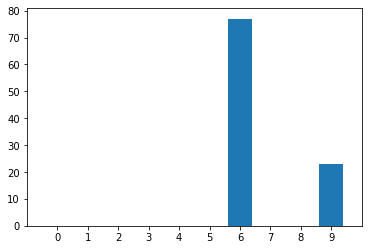

----------------------------------------------------------------------------------------------------


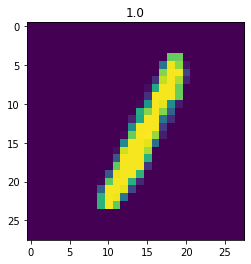

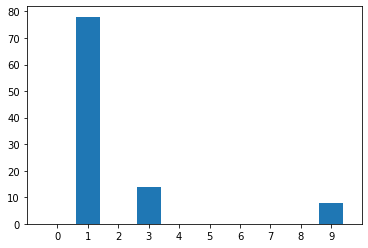

----------------------------------------------------------------------------------------------------


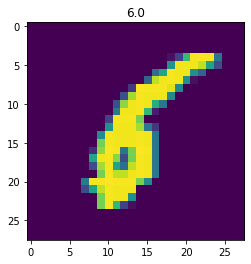

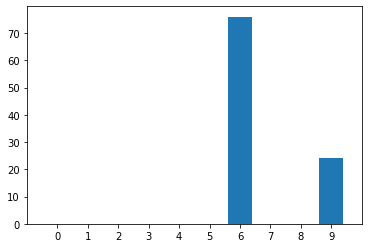

----------------------------------------------------------------------------------------------------


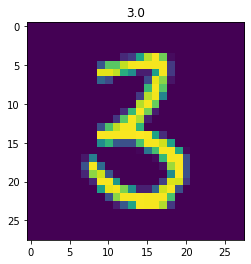

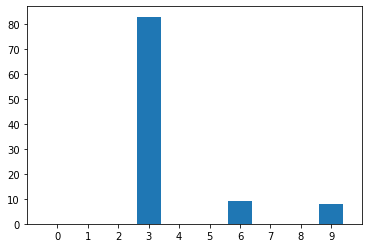

----------------------------------------------------------------------------------------------------


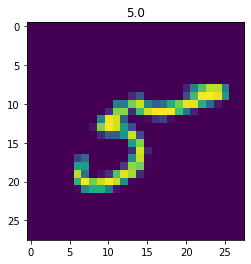

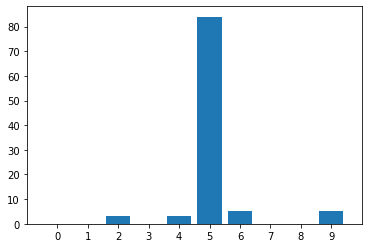

----------------------------------------------------------------------------------------------------


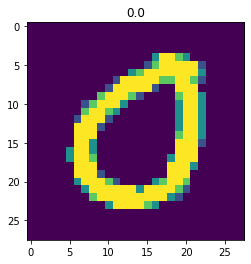

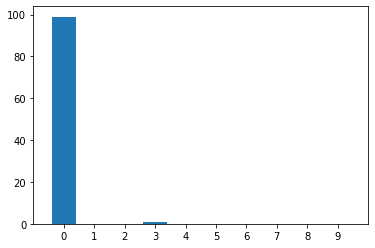

----------------------------------------------------------------------------------------------------


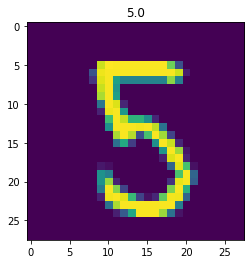

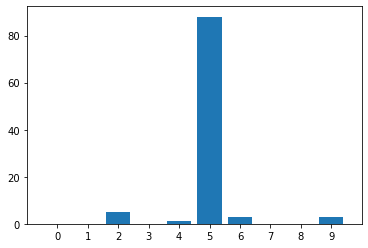

----------------------------------------------------------------------------------------------------


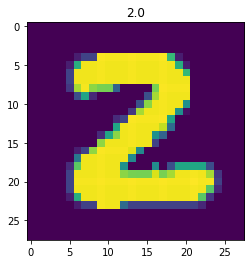

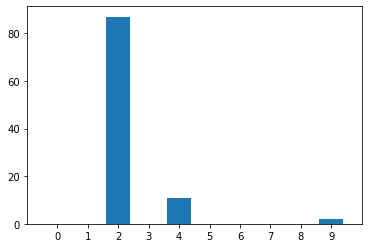

----------------------------------------------------------------------------------------------------


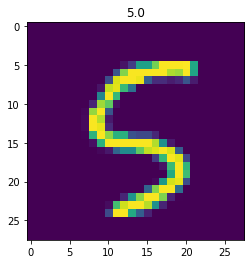

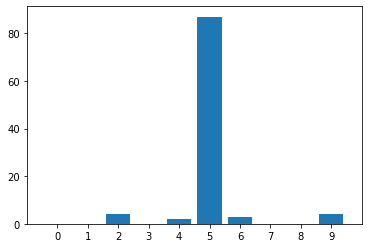

----------------------------------------------------------------------------------------------------


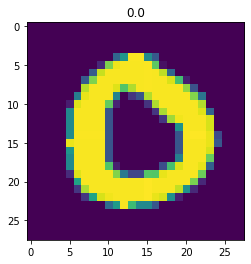

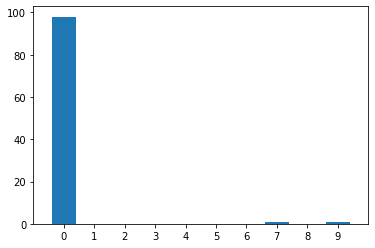

----------------------------------------------------------------------------------------------------


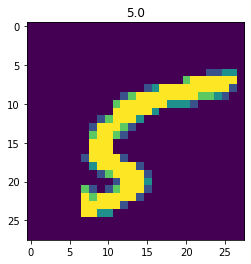

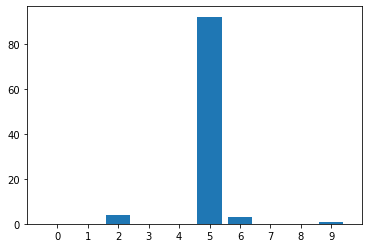

----------------------------------------------------------------------------------------------------


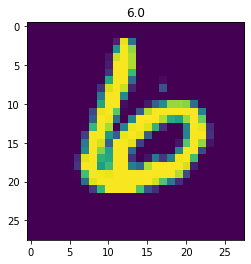

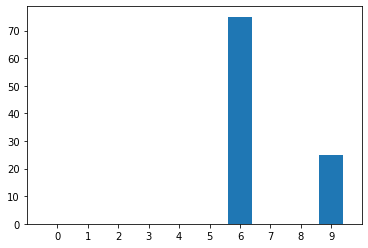

----------------------------------------------------------------------------------------------------


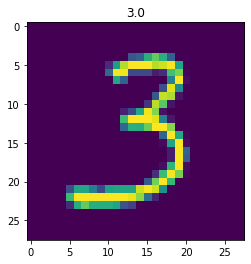

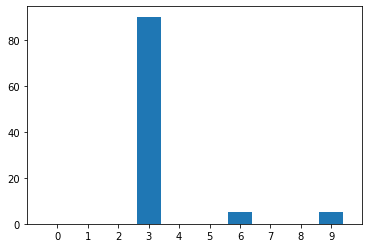

----------------------------------------------------------------------------------------------------


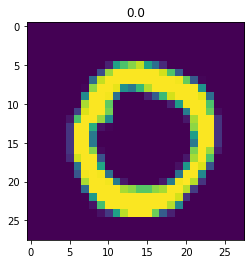

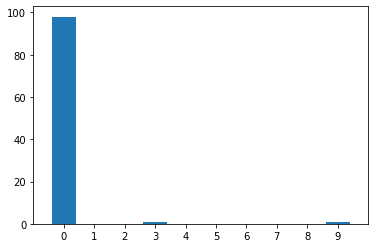

----------------------------------------------------------------------------------------------------


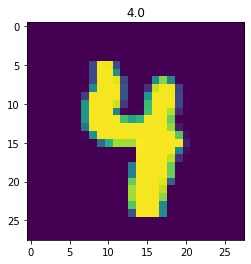

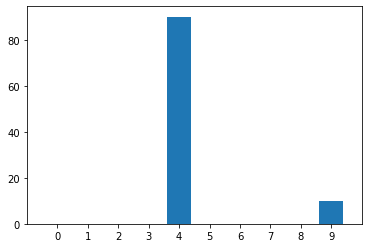

----------------------------------------------------------------------------------------------------


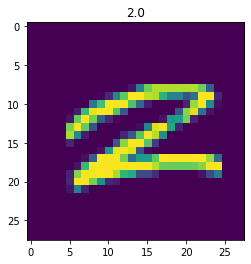

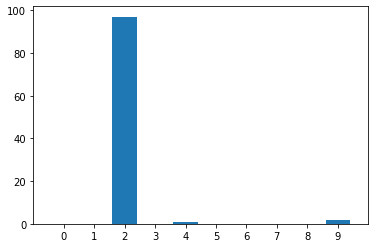

----------------------------------------------------------------------------------------------------


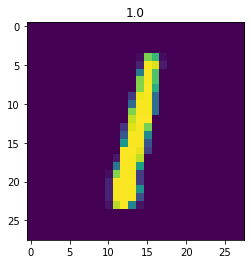

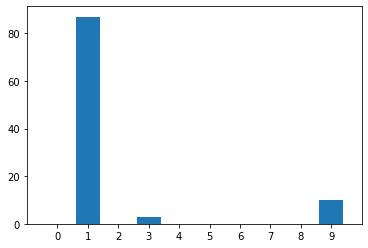

----------------------------------------------------------------------------------------------------


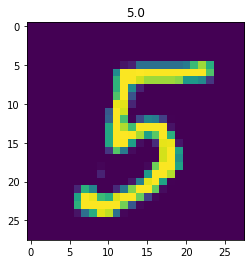

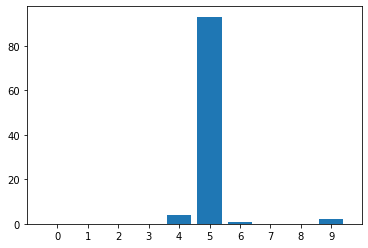

----------------------------------------------------------------------------------------------------


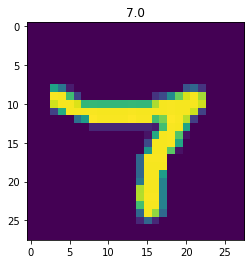

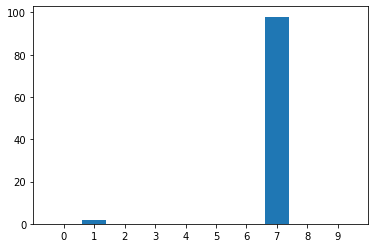

----------------------------------------------------------------------------------------------------


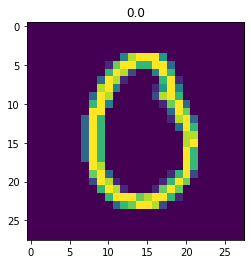

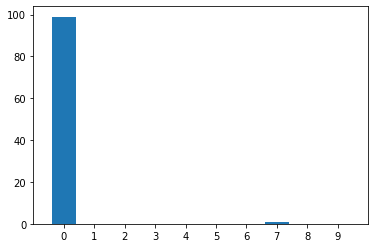

----------------------------------------------------------------------------------------------------


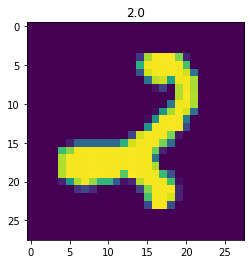

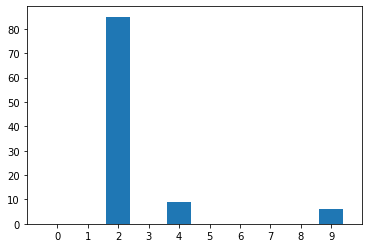

----------------------------------------------------------------------------------------------------


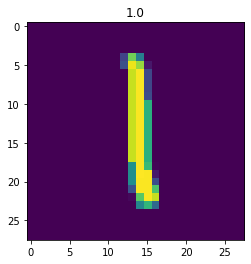

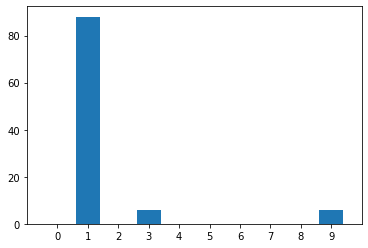

----------------------------------------------------------------------------------------------------


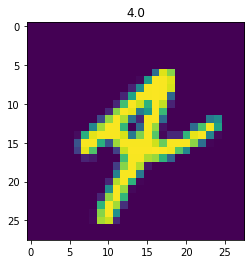

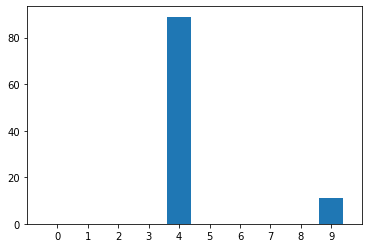

----------------------------------------------------------------------------------------------------


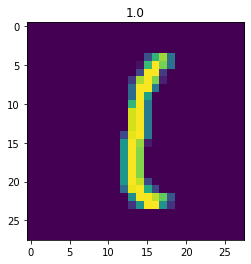

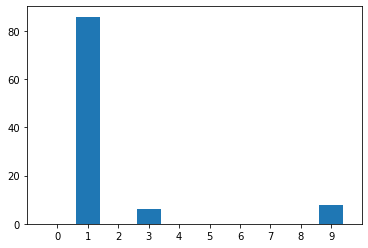

----------------------------------------------------------------------------------------------------


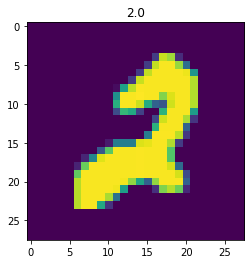

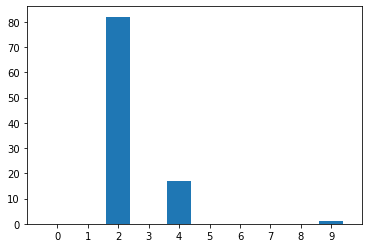

----------------------------------------------------------------------------------------------------


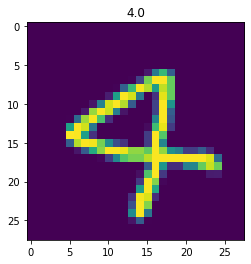

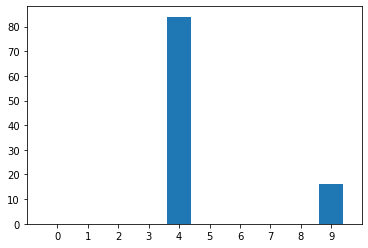

----------------------------------------------------------------------------------------------------


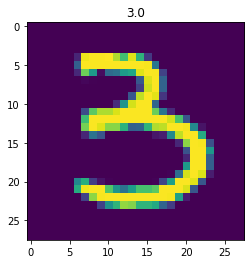

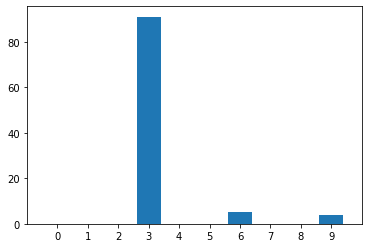

----------------------------------------------------------------------------------------------------


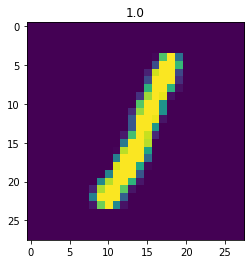

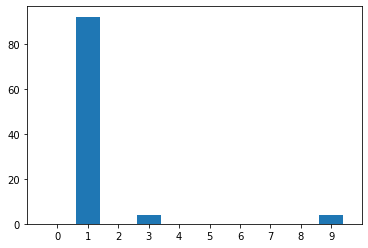

----------------------------------------------------------------------------------------------------


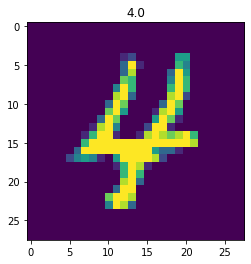

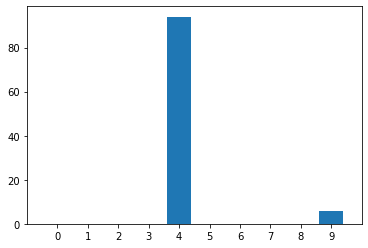

----------------------------------------------------------------------------------------------------


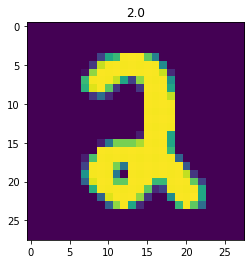

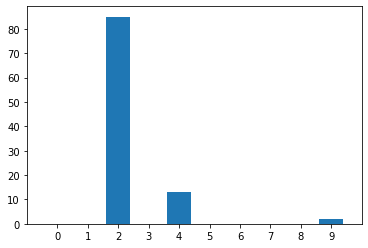

----------------------------------------------------------------------------------------------------


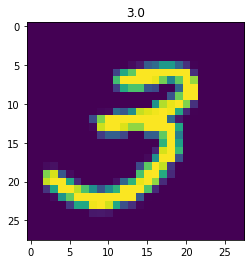

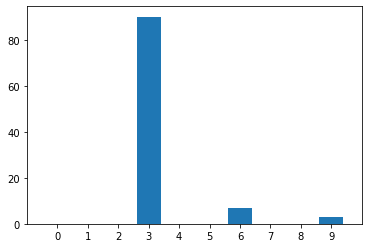

----------------------------------------------------------------------------------------------------


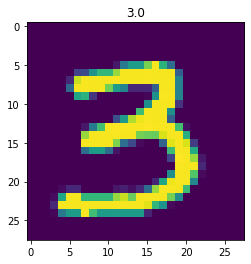

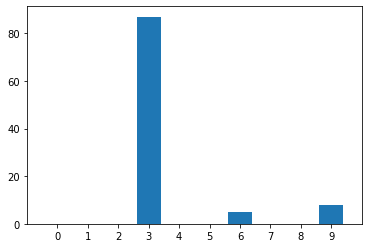

----------------------------------------------------------------------------------------------------


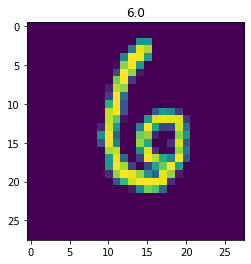

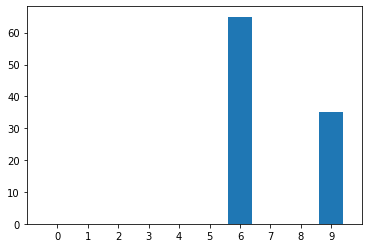

----------------------------------------------------------------------------------------------------


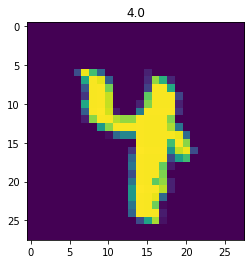

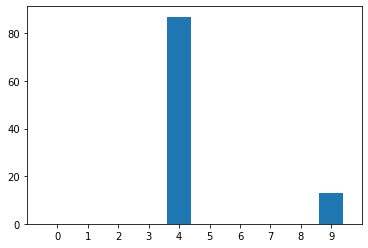

----------------------------------------------------------------------------------------------------


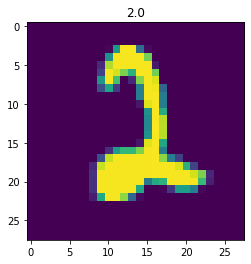

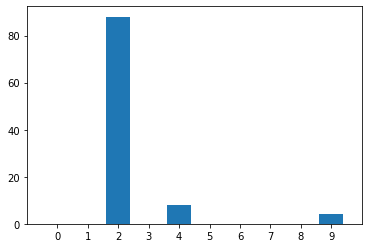

----------------------------------------------------------------------------------------------------


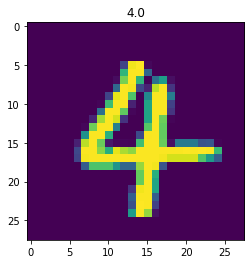

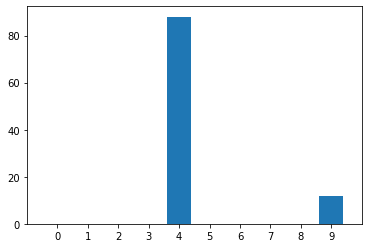

----------------------------------------------------------------------------------------------------


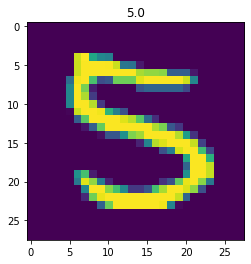

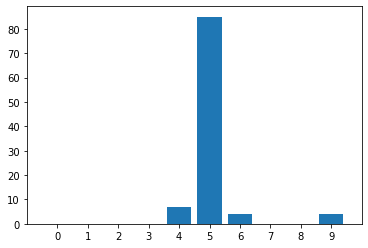

----------------------------------------------------------------------------------------------------


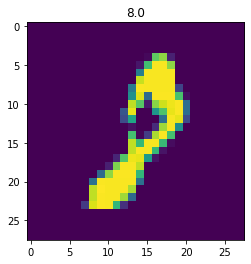

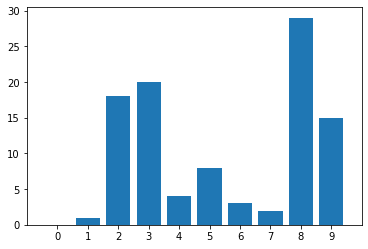

----------------------------------------------------------------------------------------------------


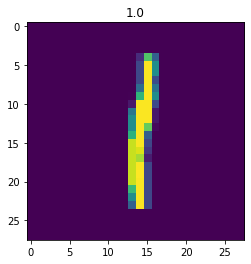

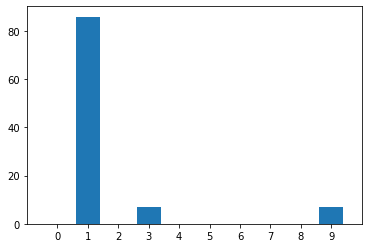

----------------------------------------------------------------------------------------------------


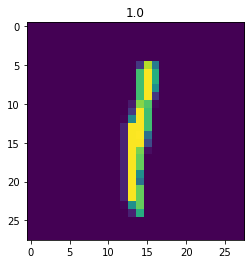

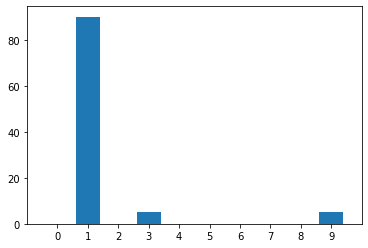

----------------------------------------------------------------------------------------------------


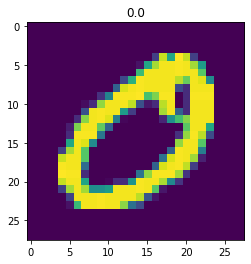

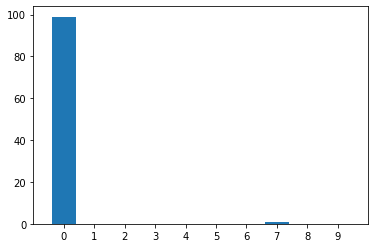

----------------------------------------------------------------------------------------------------


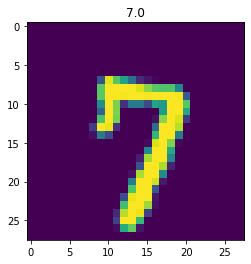

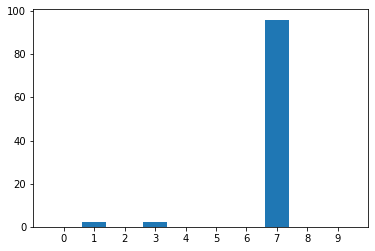

----------------------------------------------------------------------------------------------------


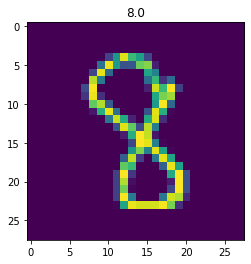

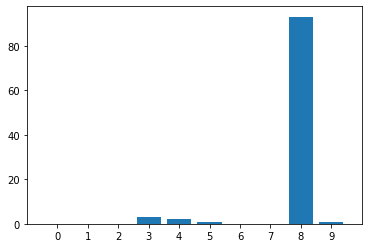

----------------------------------------------------------------------------------------------------


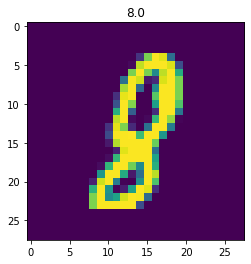

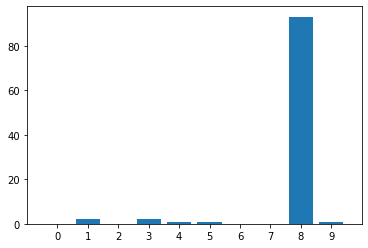

----------------------------------------------------------------------------------------------------


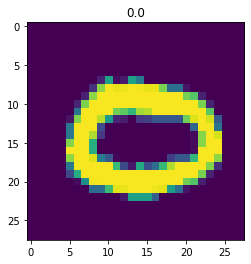

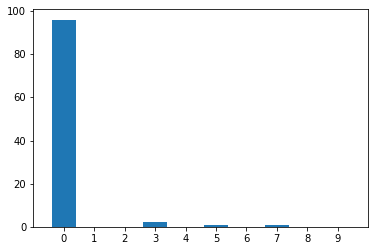

----------------------------------------------------------------------------------------------------


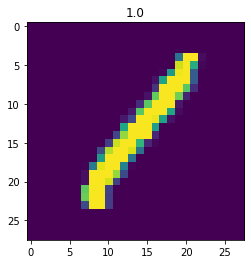

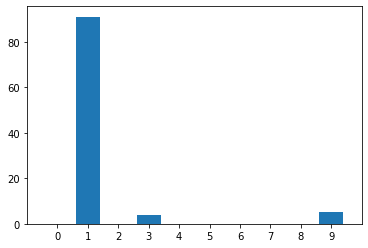

----------------------------------------------------------------------------------------------------


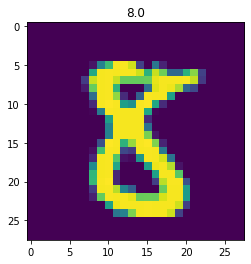

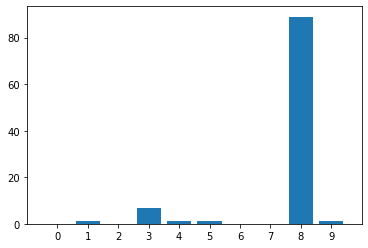

----------------------------------------------------------------------------------------------------


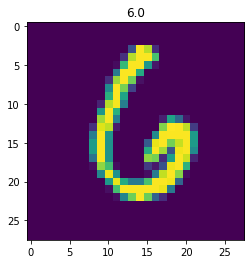

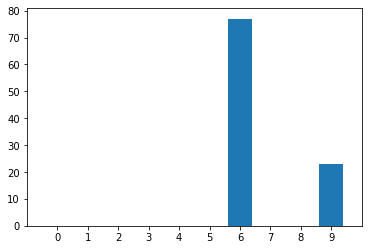

----------------------------------------------------------------------------------------------------


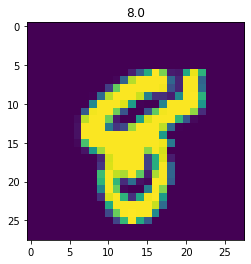

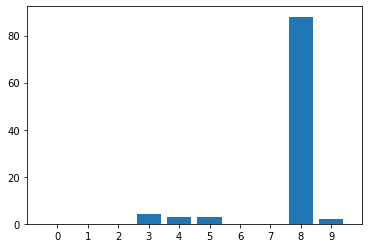

----------------------------------------------------------------------------------------------------


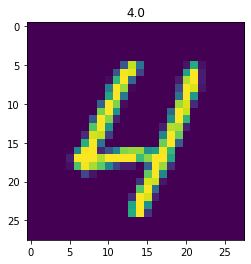

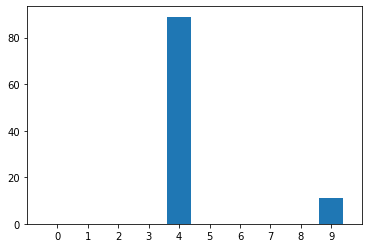

----------------------------------------------------------------------------------------------------


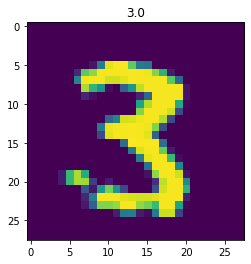

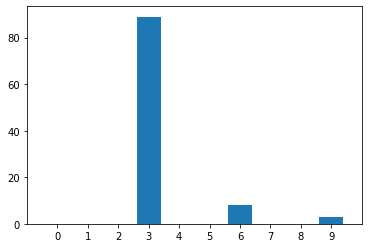

----------------------------------------------------------------------------------------------------


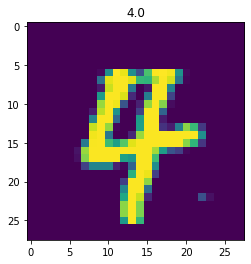

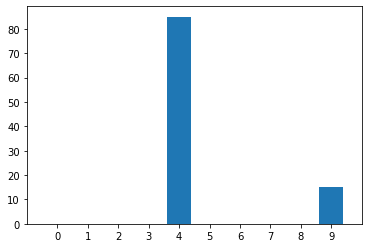

----------------------------------------------------------------------------------------------------


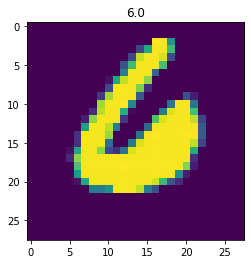

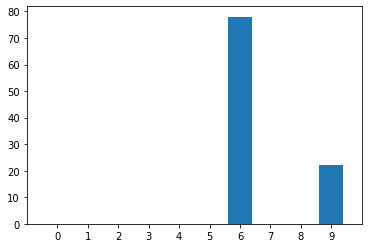

----------------------------------------------------------------------------------------------------


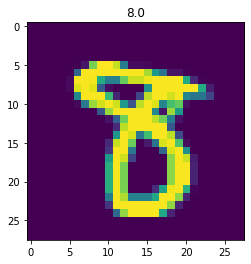

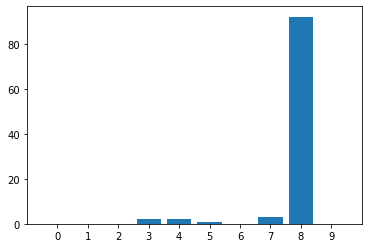

----------------------------------------------------------------------------------------------------


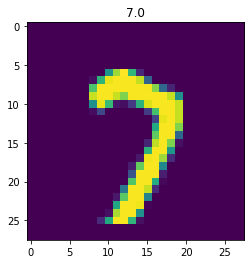

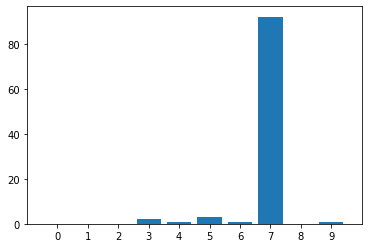

----------------------------------------------------------------------------------------------------


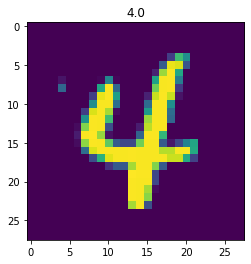

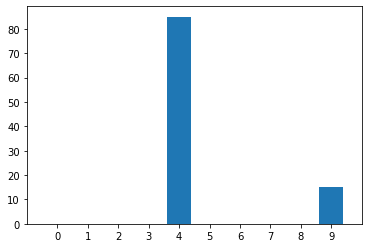

----------------------------------------------------------------------------------------------------


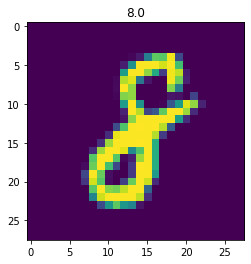

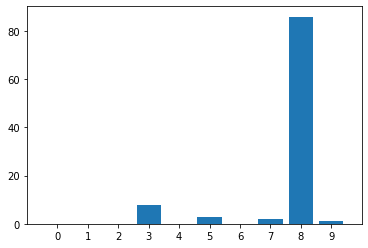

----------------------------------------------------------------------------------------------------


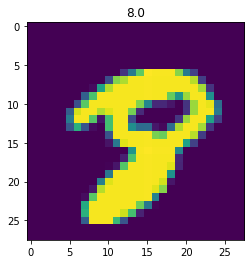

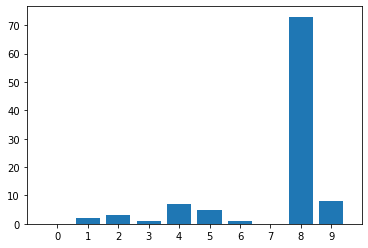

----------------------------------------------------------------------------------------------------


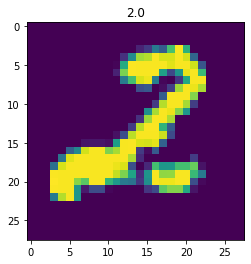

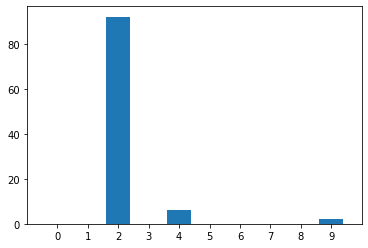

----------------------------------------------------------------------------------------------------


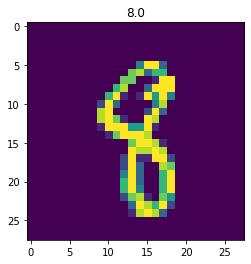

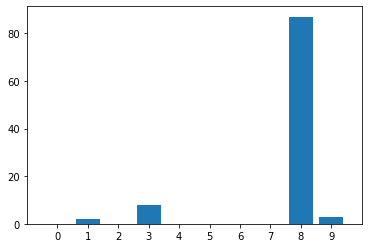

----------------------------------------------------------------------------------------------------


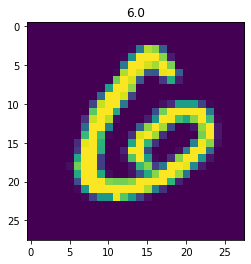

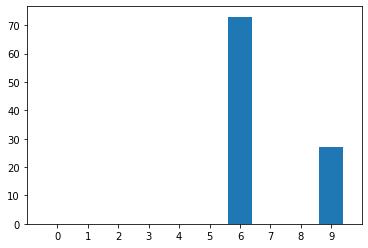

----------------------------------------------------------------------------------------------------


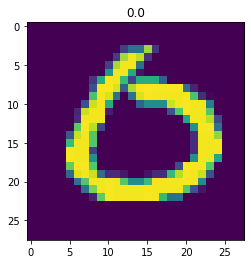

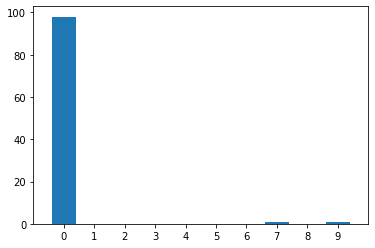

----------------------------------------------------------------------------------------------------


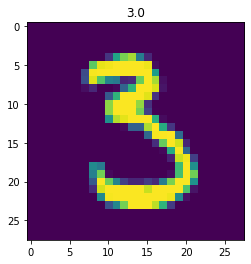

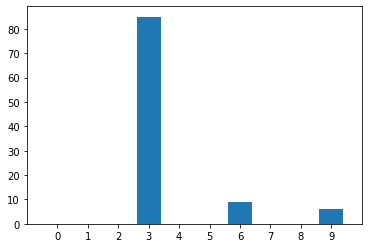

----------------------------------------------------------------------------------------------------


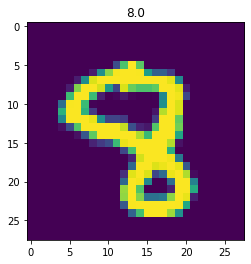

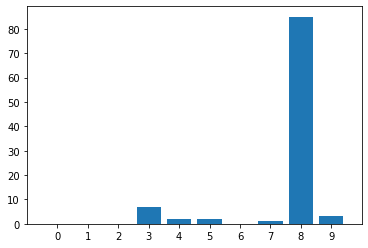

----------------------------------------------------------------------------------------------------


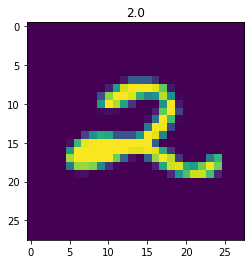

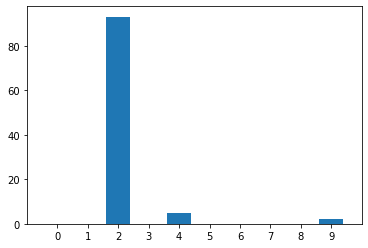

----------------------------------------------------------------------------------------------------


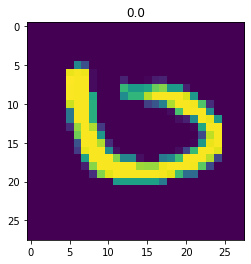

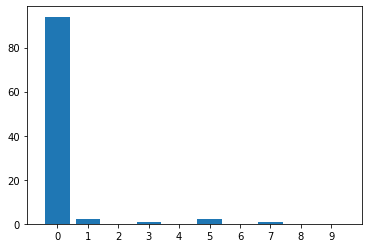

----------------------------------------------------------------------------------------------------


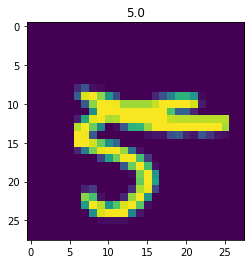

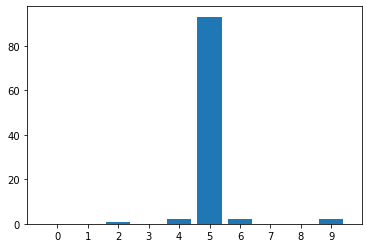

----------------------------------------------------------------------------------------------------


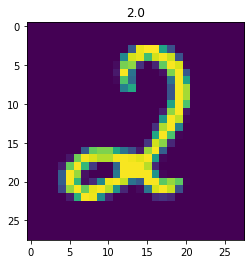

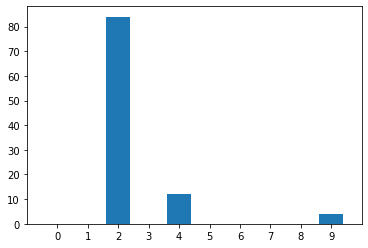

----------------------------------------------------------------------------------------------------


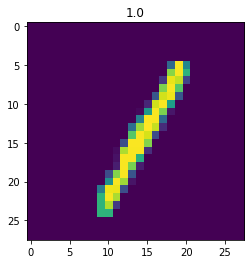

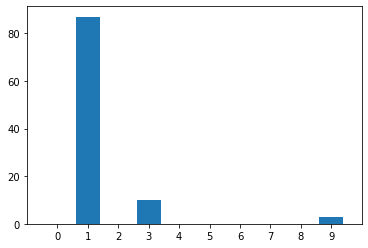

----------------------------------------------------------------------------------------------------


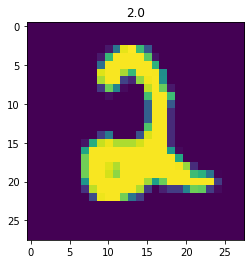

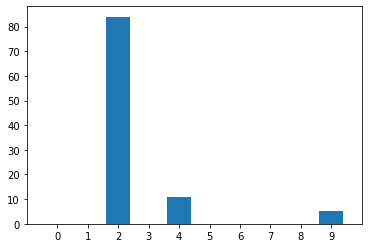

----------------------------------------------------------------------------------------------------


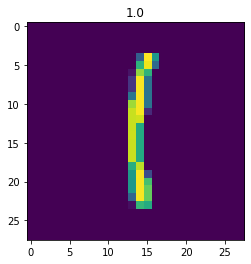

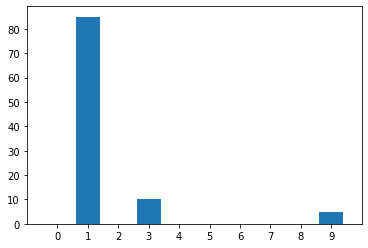

----------------------------------------------------------------------------------------------------


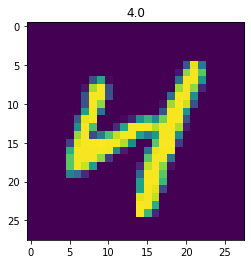

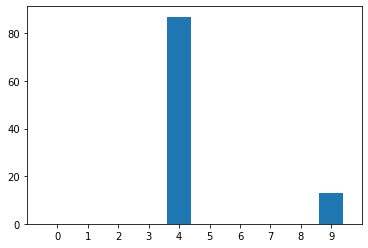

----------------------------------------------------------------------------------------------------


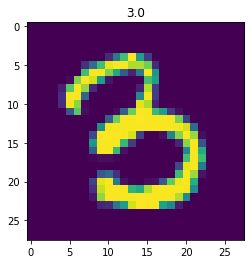

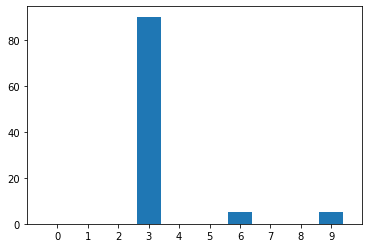

----------------------------------------------------------------------------------------------------


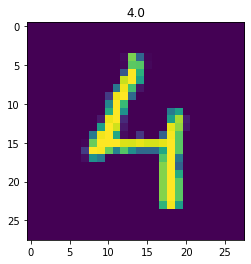

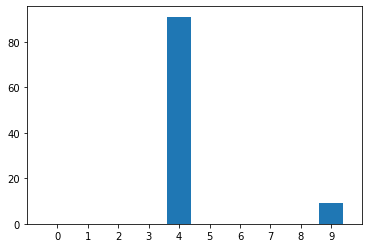

----------------------------------------------------------------------------------------------------


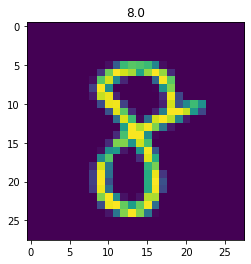

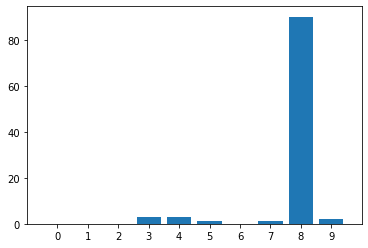

----------------------------------------------------------------------------------------------------


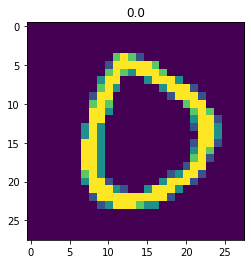

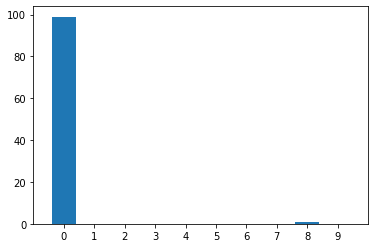

----------------------------------------------------------------------------------------------------


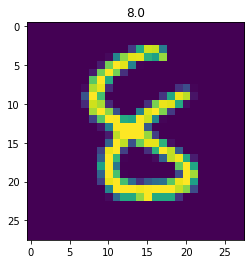

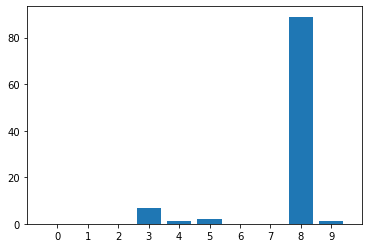

----------------------------------------------------------------------------------------------------


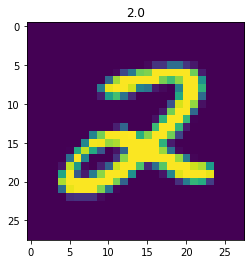

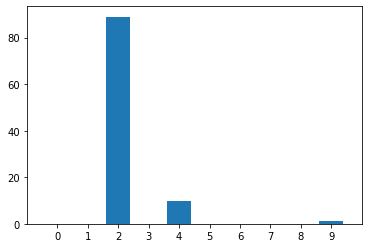

----------------------------------------------------------------------------------------------------


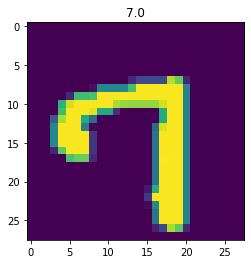

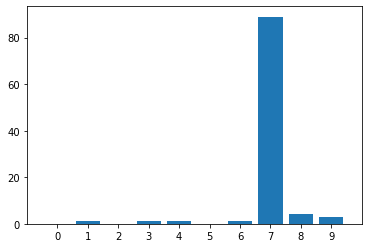

----------------------------------------------------------------------------------------------------


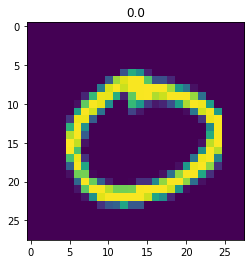

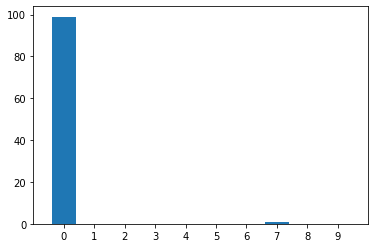

----------------------------------------------------------------------------------------------------


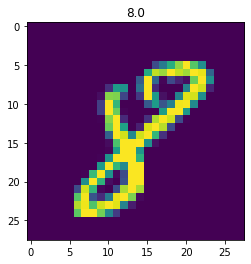

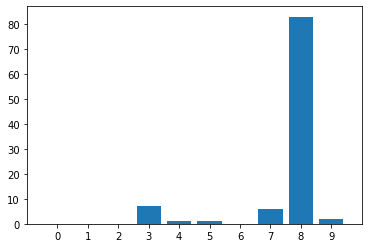

----------------------------------------------------------------------------------------------------


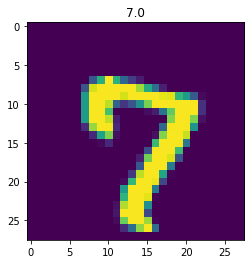

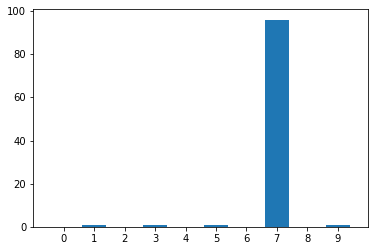

----------------------------------------------------------------------------------------------------


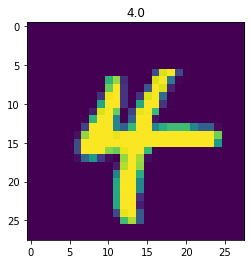

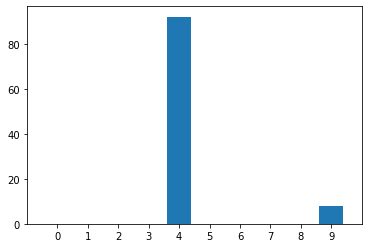

----------------------------------------------------------------------------------------------------


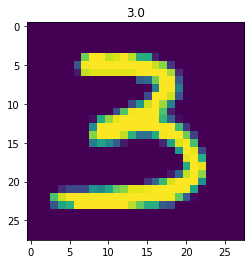

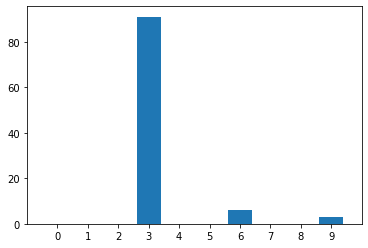

----------------------------------------------------------------------------------------------------


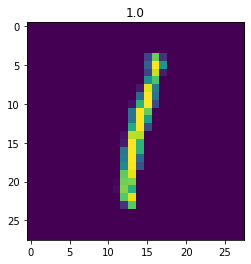

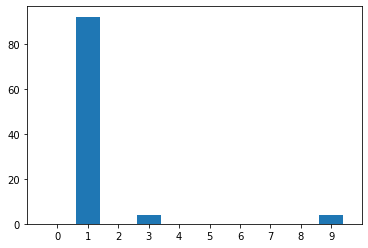

----------------------------------------------------------------------------------------------------


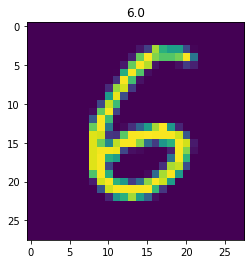

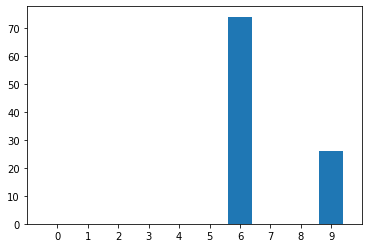

----------------------------------------------------------------------------------------------------


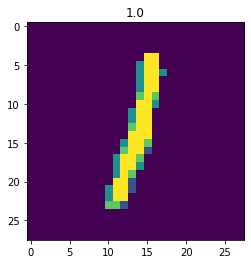

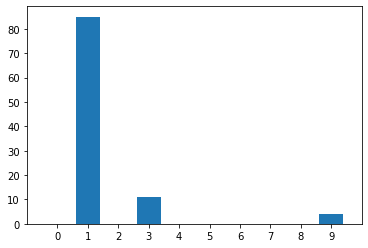

----------------------------------------------------------------------------------------------------


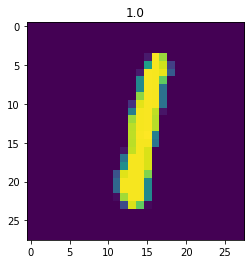

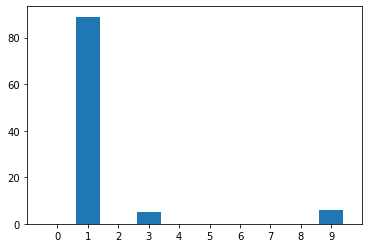

----------------------------------------------------------------------------------------------------


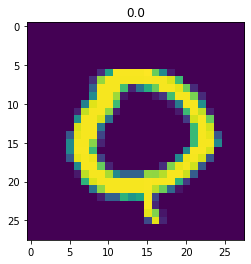

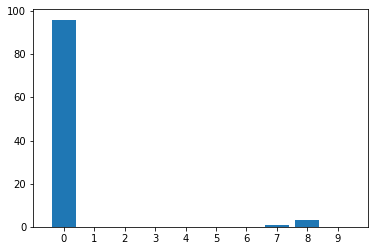

----------------------------------------------------------------------------------------------------


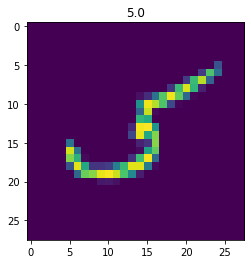

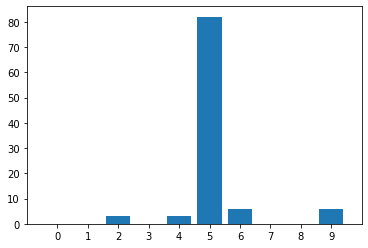

----------------------------------------------------------------------------------------------------


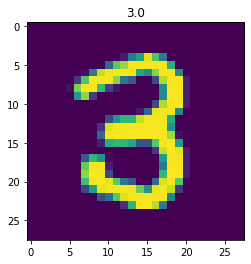

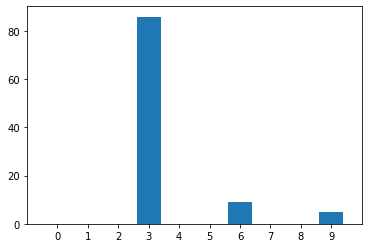

----------------------------------------------------------------------------------------------------


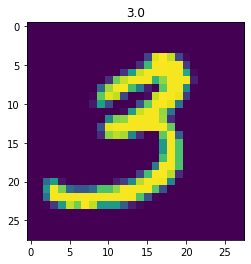

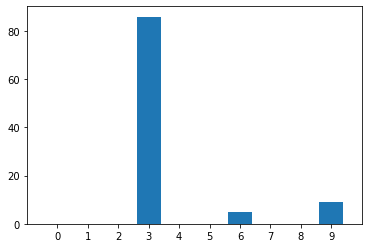

----------------------------------------------------------------------------------------------------


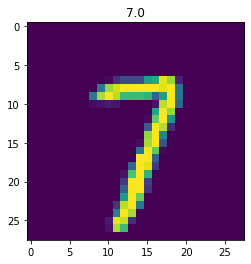

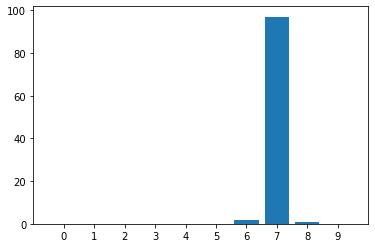

----------------------------------------------------------------------------------------------------


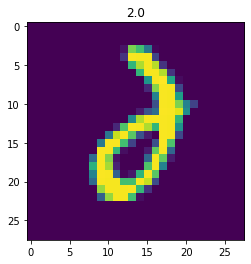

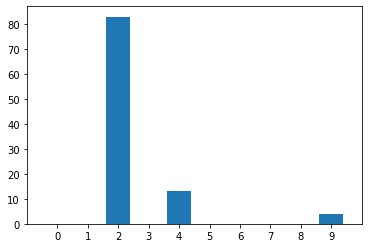

----------------------------------------------------------------------------------------------------


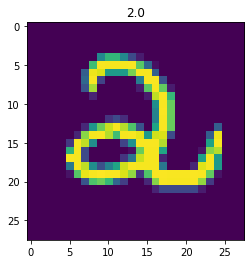

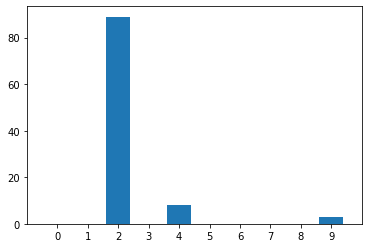

----------------------------------------------------------------------------------------------------


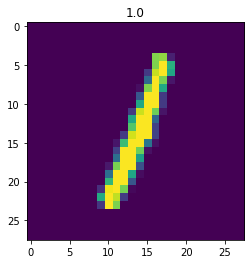

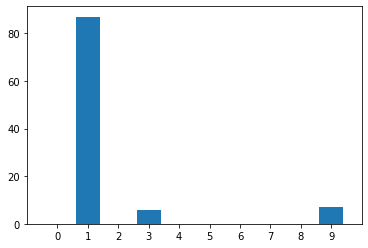

----------------------------------------------------------------------------------------------------


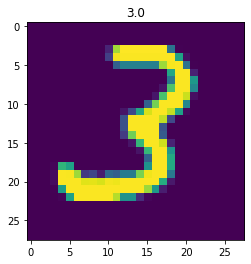

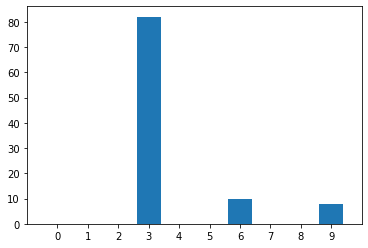

----------------------------------------------------------------------------------------------------


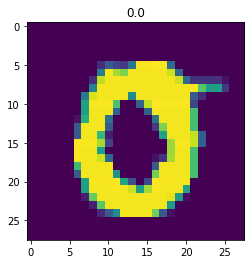

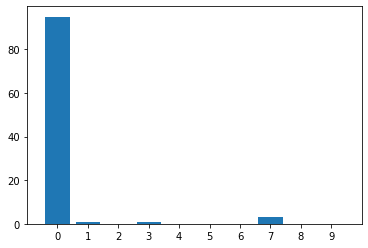

----------------------------------------------------------------------------------------------------


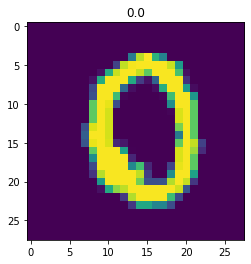

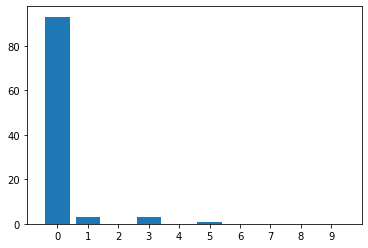

----------------------------------------------------------------------------------------------------


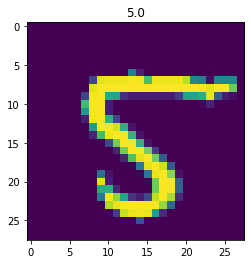

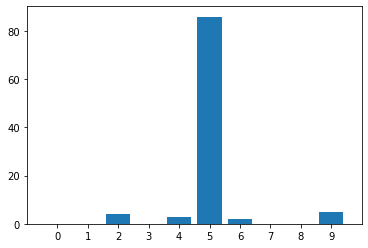

----------------------------------------------------------------------------------------------------


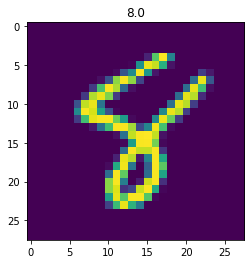

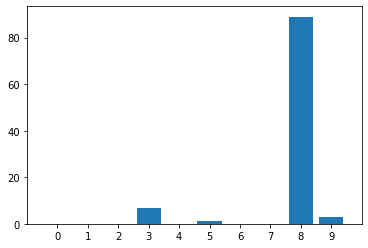

----------------------------------------------------------------------------------------------------


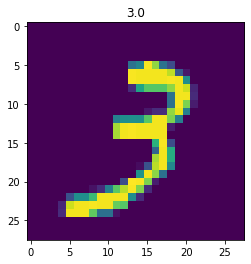

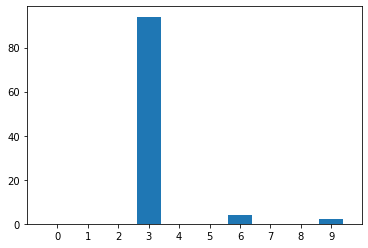

----------------------------------------------------------------------------------------------------


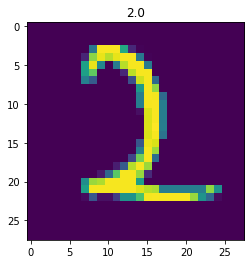

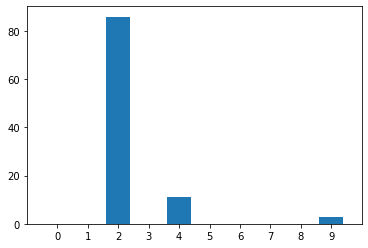

----------------------------------------------------------------------------------------------------


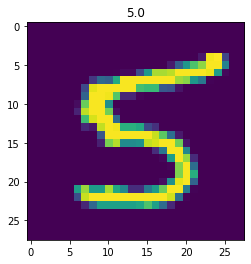

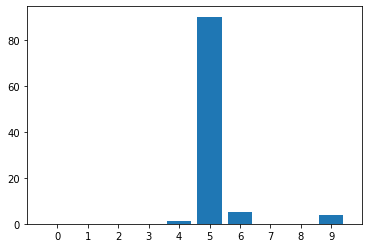

----------------------------------------------------------------------------------------------------


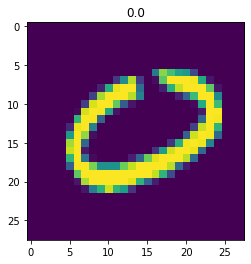

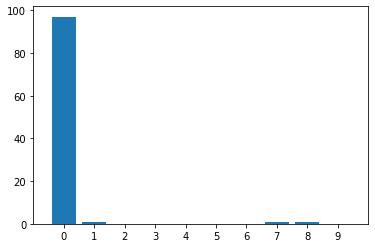

----------------------------------------------------------------------------------------------------


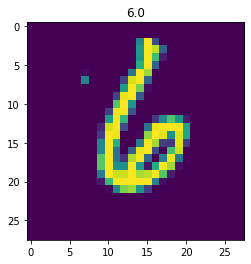

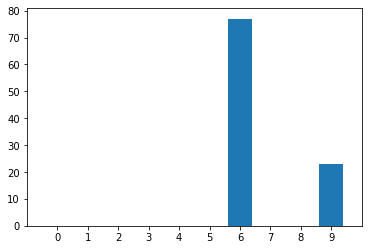

----------------------------------------------------------------------------------------------------


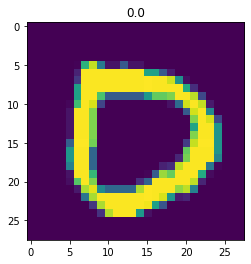

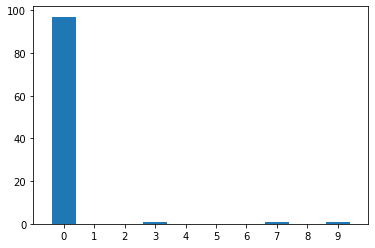

----------------------------------------------------------------------------------------------------


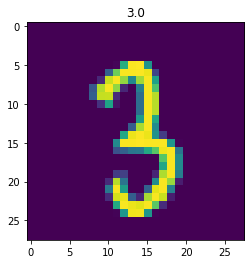

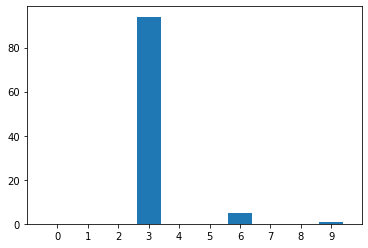

----------------------------------------------------------------------------------------------------


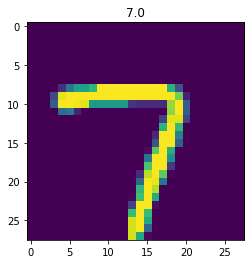

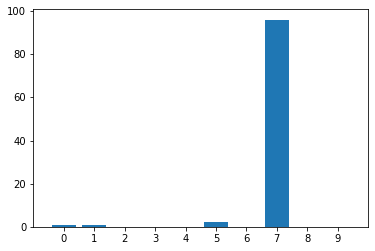

----------------------------------------------------------------------------------------------------


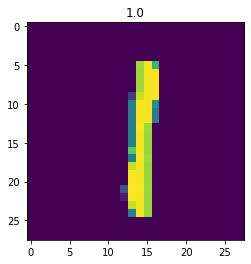

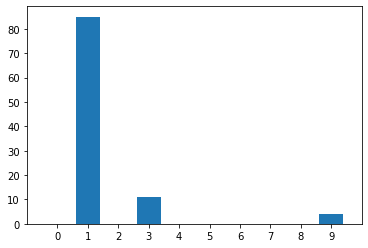

----------------------------------------------------------------------------------------------------


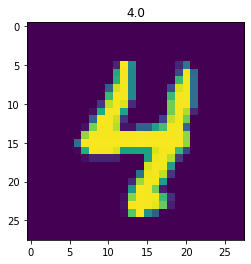

KeyboardInterrupt: 

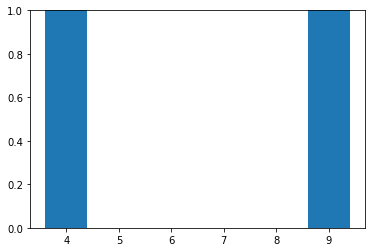

In [11]:
plot_mcdo_classification(args, model_mcdo, dataset, params_mcdo)gridsv

In [15]:
mfg_regression_inference(args, model_mfg, dataset, params_mfg, val_id=0)

tensor([21.7000], device='cuda:0')


NameError: name 'std_normal' is not defined

In [13]:
mcdo_regression_inference(args, model_mcdo, dataset, params_mcdo, val_id=0)

tensor([21.7000], device='cuda:0')
Marginalized answer  21.751021728515624
True answer tensor([21.7000], device='cuda:0')
----------------------------------------------------------------------------------------------------
Parameters are:
Weight:
Mean is 
 [[-1.1543107 ]
 [ 1.53413   ]
 [-1.686492  ]
 [ 0.5431452 ]
 [-0.03910854]
 [ 1.3241545 ]
 [-0.30524686]
 [-0.48447663]
 [ 2.9014547 ]
 [-0.29886362]]
----------------------------------------------------------------------------------------------------
Parameters are:
Bias:
Mean is 
 [[22.657314]]
